# Project- Machine Learning
### Group 10
__________________

#### import some libraries that we need for this code.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import random
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn import neighbors


pd.set_option('display.max_columns', 30)                 # To show all the columns in the tables


from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold
from scipy import interp

from sklearn.model_selection import train_test_split


#### Read the train data and test data from a csv files

In [2]:
data = pd.read_csv("train.csv")                         # Read the train data
test = pd.read_csv("test_without_target.csv")           # Read the test data
test=test.iloc[:,1:]

## part A- Explore the data

In Part A, we will explore the data. This is done by displaying statistics, data types, correlations between them and etc.
In addition, visualization was done for the investigation.
This is mostly done by pandas, sns and matplotlib.

----------------------------------------------------------
##### First, we will show some rows of the data, its shape, its type, statistics about it, and how much null contains in each column.

Show the 5 first rows from the data

In [3]:
print ('These are the 5 first rows:')
data.head()

These are the 5 first rows:


0          1    2     3      4  5    6         7         8   9  \
0  1.170981   5.672133  0.6  80.0   76.0  D  a21  1.107143  0.692857   5   
1  2.595788  23.203289  6.4  43.0   64.0  N   a9  1.700000  0.614286  11   
2  0.972794   7.127348  0.4  63.0  100.0  C   a4  1.242857  0.428571   6   
3  1.891667  17.881507  4.2  65.0   71.0  K  a15  1.050000  0.671429  10   
4  1.965881  13.936969  3.2  40.0   62.0  F   a1  1.950000  1.085714   3   

         10      11      12 13     14     15    16    17 18   19    20    21  \
0  0.702957  1024.1  1025.9  0  0.6mm   32.0  13.9  12.2  D    D  28.0   7.0   
1  0.223911  1005.3  1008.1  0  0.0mm   50.0  18.6  16.5  N    I  61.0  43.0   
2  0.180848  1020.8  1026.5  0  0.0mm    NaN  16.5   9.6  M  NaN  15.0   7.0   
3  0.181289  1021.9  1019.8  0  0.8mm   88.0  14.2  11.4  K    D  39.0  24.0   
4  0.237347  1005.3  1007.8  0  0.0mm  112.0  26.6  23.4  C  NaN  30.0  20.0   

     22     23          24  label  
0  2011   40.0   15.420787      1  
1  2012  110.0  240.496883      0  
2  2012    0.0  224.282903      0  
3  2010  130.0   86.810830      0  
4  2011    0.0  120.642922      0

Show the 5 last rows from the data

In [4]:
print ('These are the 5 last rows:')
data.tail()

These are the 5 last rows:


0          1    2     3     4    5    6         7         8  9  \
22156  1.408356  13.767739  2.8  55.0  83.0    K  a23  1.364286  0.685714  4   
22157  2.259704  15.816408  3.8  37.0  71.0    I   a5  1.507143  0.742857  5   
22158  2.179382  15.663662  3.4  96.0  95.0    G   a0  0.957143  0.821429  7   
22159  2.014433  15.594799  3.2  89.0  95.0    N  a17  1.000000  0.700000  5   
22160  1.823822  16.990636  4.0  59.0  62.0  NaN  a25  1.257143  0.885714  9   

             10      11      12 13      14    15    16    17 18 19    20  \
22156  0.119284  1022.0  1022.0  1   1.8mm  99.0  17.5  13.8  D  I  31.0   
22157  0.248723  1020.3  1023.1  0   0.0mm  90.0  20.4  12.4  N  I  30.0   
22158  0.076460  1016.0  1018.7  1  10.8mm   NaN  13.3  11.9  E  G  46.0   
22159  0.284438  1008.5  1010.5  1   2.6mm  27.0  11.9  12.5  J  J  50.0   
22160  0.265140  1033.1  1037.1  0   0.0mm  57.0  16.1  14.5  C  A   NaN   

         21    22     23          24  label  
22156  15.0  2010   90.0  115.748582      0  
22157   9.0  2012  240.0  259.280483      0  
22158  15.0  2012  260.0  392.348764      1  
22159  17.0  2010  150.0  259.886217      1  
22160  19.0  2010   70.0   83.368091      0

Show the numbers of rows and columns-the shape

In [5]:
print ('The shape of the data is:',data.shape )

The shape of the data is: (22161, 26)


Show the information as: number of non null rows for each columns and the type

In [6]:
# data.dtypes                                      The info method include this information so we didn't use it

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
0        22161 non-null float64
1        22161 non-null float64
2        22161 non-null float64
3        22102 non-null float64
4        22057 non-null float64
5        20812 non-null object
6        22161 non-null object
7        22154 non-null float64
8        22143 non-null float64
9        22161 non-null int64
10       22161 non-null float64
11       22055 non-null float64
12       22048 non-null float64
13       22161 non-null object
14       22161 non-null object
15       20290 non-null float64
16       22133 non-null float64
17       22109 non-null float64
18       21951 non-null object
19       21141 non-null object
20       20816 non-null float64
21       22062 non-null float64
22       22161 non-null int64
23       22061 non-null float64
24       22061 non-null float64
label    22161 non-null int64
dtypes: float64(17), int64(3), object(6)
memory usage: 4.4+ MB


Show statistics calculating for numeric columns and for categorial columns. we can see count,mean,std,min,max and some percentages

In [8]:
print ('These are statistics about the numeric columns:')
data.describe()                                   

These are statistics about the numeric columns:


0             1             2             3             4  \
count  22161.000000  22161.000000  22161.000000  22102.000000  22057.000000   
mean       2.185958     19.797754      4.929620     51.547009     68.497982   
std        0.815080     10.763614      3.572644     20.184353     18.231315   
min       -0.490607      2.437300      0.000000      1.000000      3.000000   
25%        1.622068     12.268371      2.400000     37.000000     57.000000   
50%        2.167701     17.833216      4.200000     52.000000     69.000000   
75%        2.720341     25.196446      6.600000     65.000000     82.000000   
max        9.092011    248.877854     81.200000    100.000000    100.000000   

                  7             8             9            10            11  \
count  22154.000000  22143.000000  22161.000000  22161.000000  22055.000000   
mean       1.648476      0.888041      6.429358      0.228284   1015.347014   
std        0.480275      0.461375      3.381488      0.161565      7.011856   
min        0.450000     -0.492857      1.000000     -0.195661    984.500000   
25%        1.271429      0.542857      3.000000      0.136002   1010.600000   
50%        1.607143      0.864286      7.000000      0.206457   1015.300000   
75%        2.007143      1.242857      9.000000      0.278929   1020.000000   
max        3.435714      2.128571     12.000000      0.954076   1038.900000   

                 12            15            16            17            20  \
count  22048.000000  20290.000000  22133.000000  22109.000000  20816.000000   
mean    1017.708572     73.685017     21.617133     17.065837     39.995484   
std        7.085807     37.866780      6.602743      6.409174     13.150807   
min      983.700000      0.000000      3.900000     -0.700000     11.000000   
25%     1013.000000     45.000000     16.500000     12.100000     31.000000   
50%     1017.700000     82.000000     21.000000     16.600000     39.000000   
75%     1022.400000    104.000000     26.400000     21.800000     48.000000   
max     1040.900000    143.000000     46.100000     36.900000    135.000000   

                 21            22            23            24         label  
count  22062.000000  22161.000000  22061.000000  22061.000000  22161.000000  
mean      19.101577   2010.945264    146.971579    224.835441      0.236451  
std        8.546933      0.823740     86.609704    160.801099      0.424912  
min        0.000000   2010.000000      0.000000      0.001355      0.000000  
25%       13.000000   2010.000000     90.000000    100.144819      0.000000  
50%       19.000000   2011.000000    130.000000    199.866581      0.000000  
75%       24.000000   2012.000000    200.000000    316.118054      0.000000  
max       69.000000   2012.000000    670.000000   1426.459838      1.000000

In [9]:
print ('These are statistics about the categorial columns:')
data.describe(include=np.object)                    

These are statistics about the categorial columns:


5      6     13     14     18     19
count   20812  22161  22161  22161  21951  21141
unique     16     31      3    315     16     16
top         D     a6      0  0.0mm      D      E
freq     1604    786  16906  13816   1659   1861

Show how many nulls the data has for each column.

In [10]:
print ('Here we can see the number of null for each column:')
print(data.isnull().sum())          

Here we can see the number of null for each column:
0           0
1           0
2           0
3          59
4         104
5        1349
6           0
7           7
8          18
9           0
10          0
11        106
12        113
13          0
14          0
15       1871
16         28
17         52
18        210
19       1020
20       1345
21         99
22          0
23        100
24        100
label       0
dtype: int64


##### Visualization
Here we show the correlation between each pair of columns by a heat map and by a pair graph for visualization. In addition we will show the histogram for each column, Box plot, plos for categorial columns and pie chart for the count of the labels. Beyond this, we see a density graph for each numeric column and also a density graph for each pair of numeric columns.

In [11]:
# data.corr()               # The number of the correlation between the paris- but we have this in the heat map

Show heat map with the correlations between all tha pairs

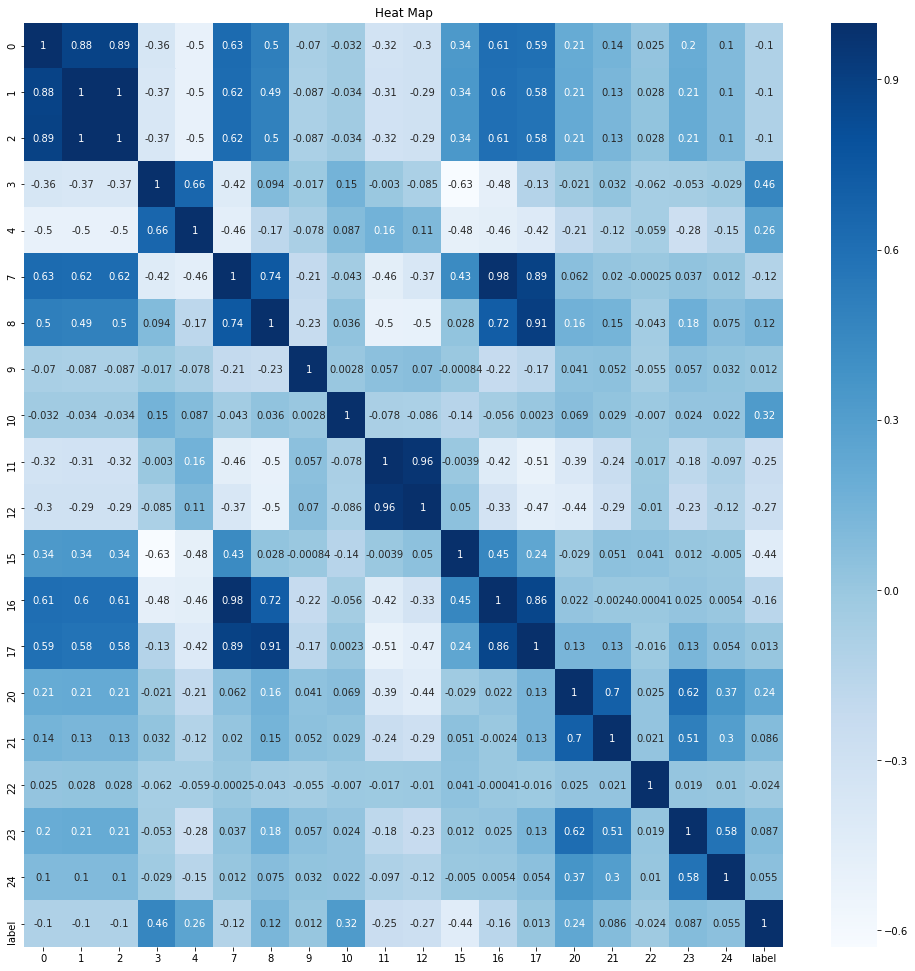

In [12]:
def showheatmap(dataframe):
    fig, ax =plt.subplots(figsize=(17, 17))
    sns.heatmap(dataframe[1:].corr(), annot=True, cmap="Blues")
    b, t = plt.ylim()                                              # discover the values for bottom and top
    b += 0.5                                                       # Add 0.5 to the bottom
    t -= 0.5                                                       # Subtract 0.5 from the top
    plt.ylim(b, t)                                                 # update the ylim(bottom, top) values
    ax.set_title('Heat Map')                                       # Add title
    plt.show()
    
showheatmap(data)

Show the correlations for all the pairs by plots (tha diagnoal shows the histogram for each feature).

C:\Users\elino\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\elino\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


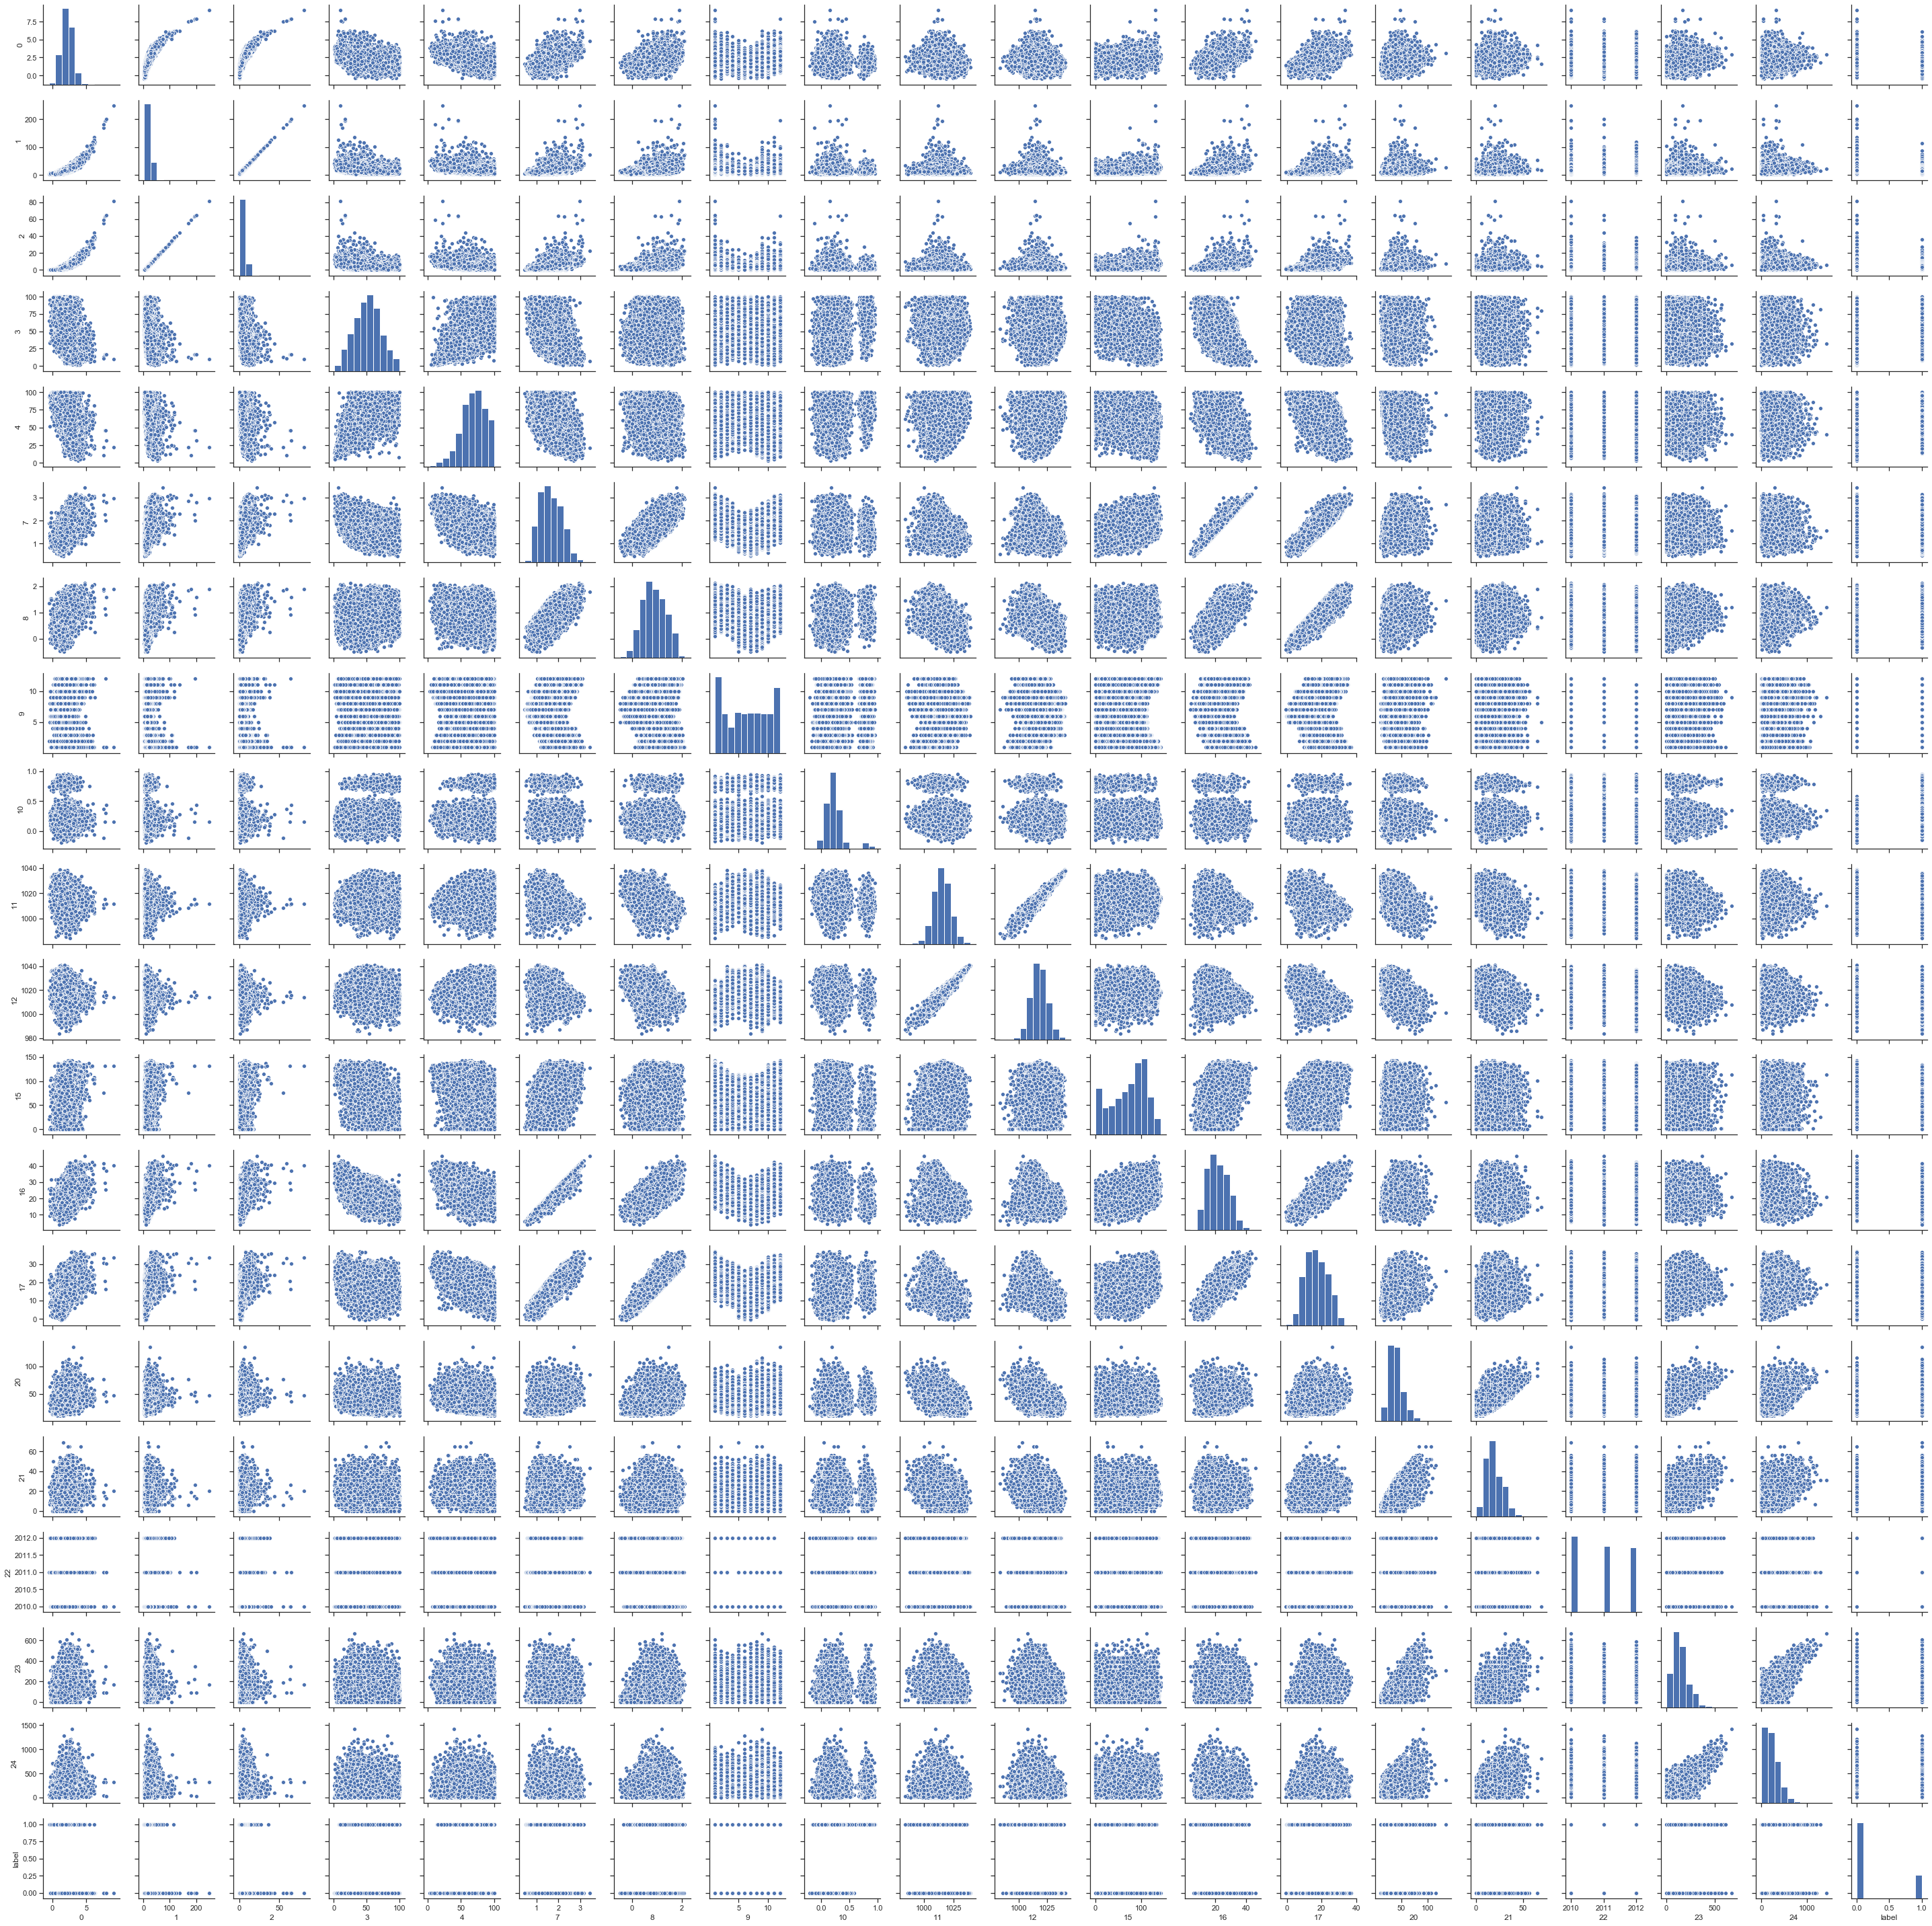

In [13]:
def showcorrelation(dataframe):
    sns.set(style="ticks", color_codes=True)
    sns.pairplot(dataframe, height=2)
    
showcorrelation(data)

Plot histogram for each numerical feature, so we can see better the manner in which the features are distributed.

Histogram for feature number 0


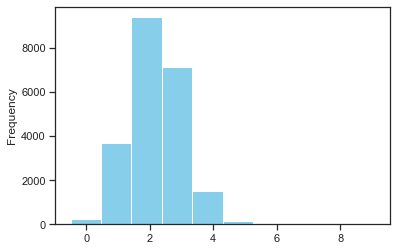

Histogram for feature number 1


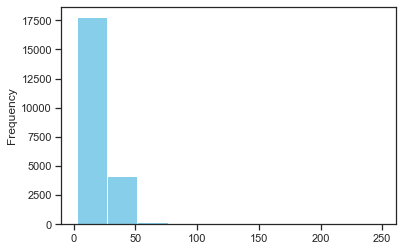

Histogram for feature number 2


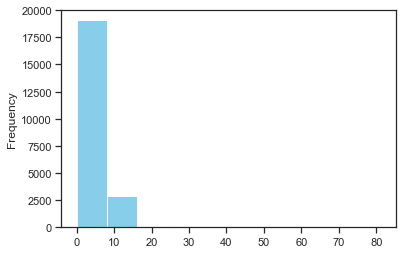

Histogram for feature number 3


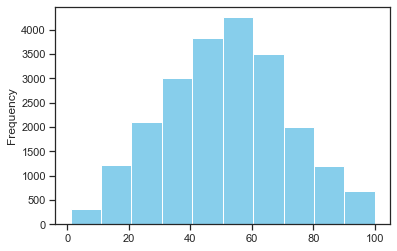

Histogram for feature number 4


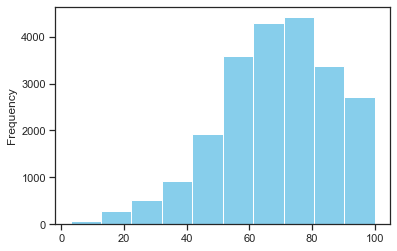

Histogram for feature number 7


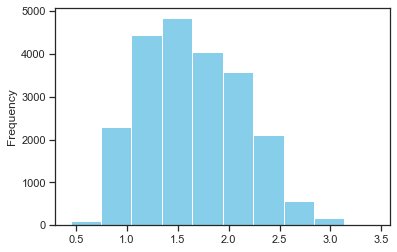

Histogram for feature number 8


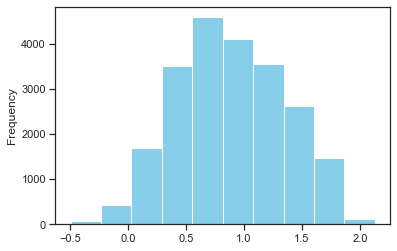

Histogram for feature number 9


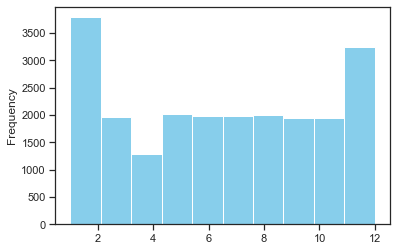

Histogram for feature number 10


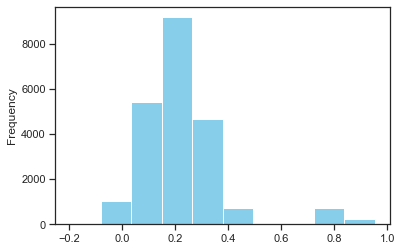

Histogram for feature number 11


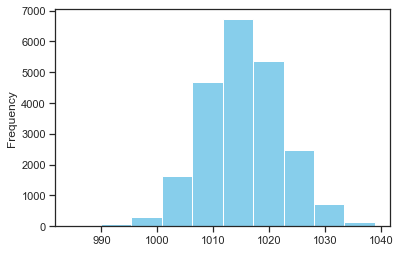

Histogram for feature number 12


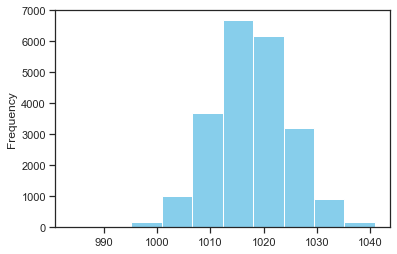

Histogram for feature number 15


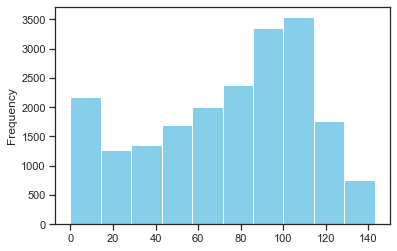

Histogram for feature number 16


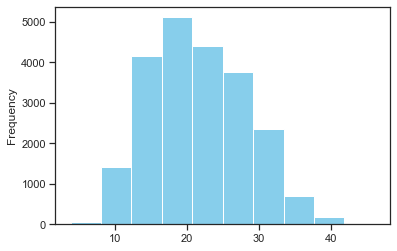

Histogram for feature number 17


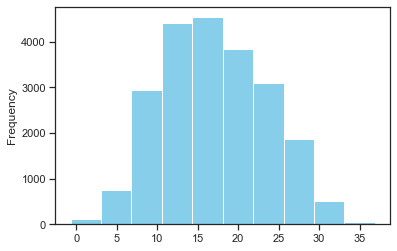

Histogram for feature number 20


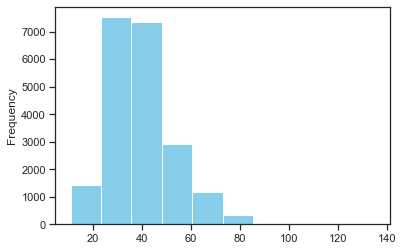

Histogram for feature number 21


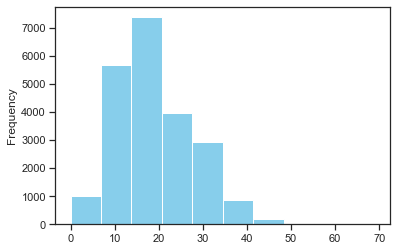

Histogram for feature number 22


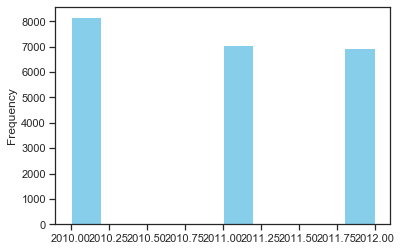

Histogram for feature number 23


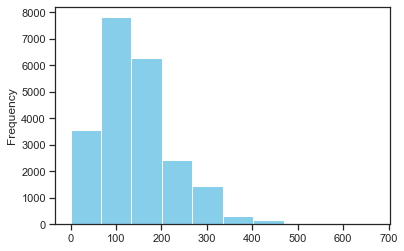

Histogram for feature number 24


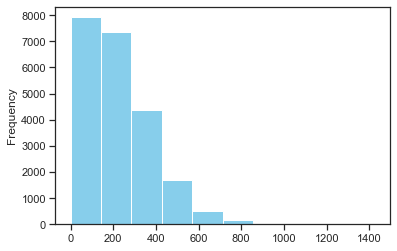

Histogram for feature number label


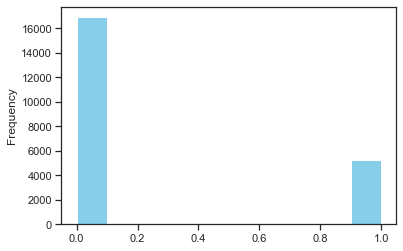

In [14]:
def get_histogram(data):                                             
    for category in data.columns[:]:                                  # All The columns 
        if (data[category].dtype!=object):                            # For all the coulmuns excpet columns from object type
            print ('Histogram for feature number',category)           # We will know the current feature
            data[category].plot.hist(color = "skyblue")               # Plot and show
            plt.show()
            
get_histogram(data)

Show a density graph for each numeric column to understand the nature of its distribution.

Density plot for feature number 0


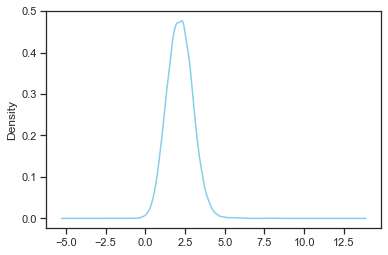

Density plot for feature number 1


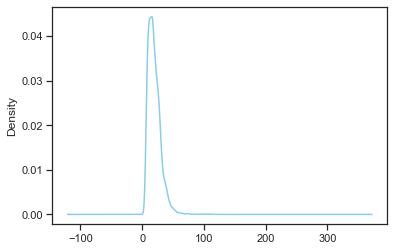

Density plot for feature number 2


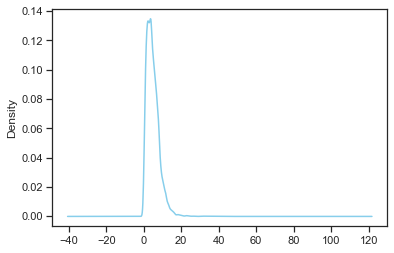

Density plot for feature number 3


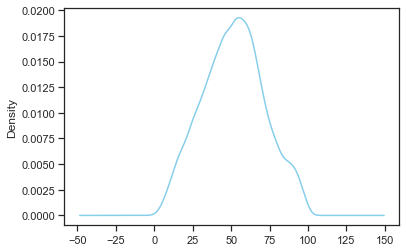

Density plot for feature number 4


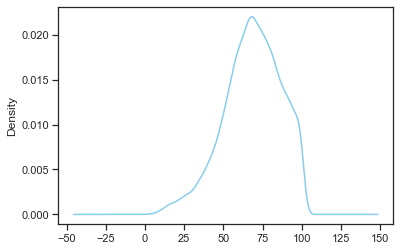

Density plot for feature number 7


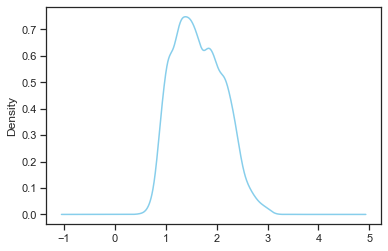

Density plot for feature number 8


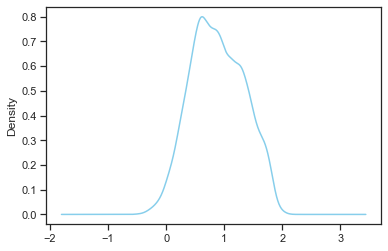

Density plot for feature number 9


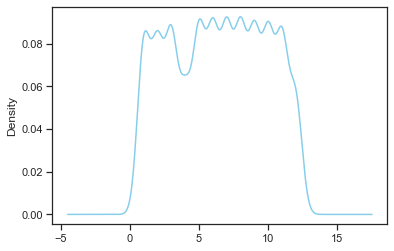

Density plot for feature number 10


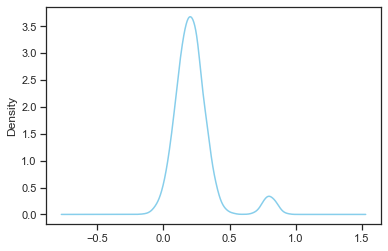

Density plot for feature number 11


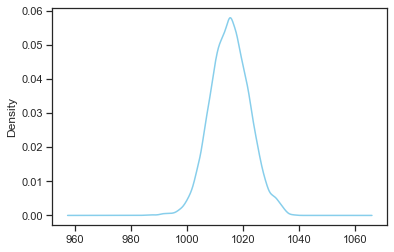

Density plot for feature number 12


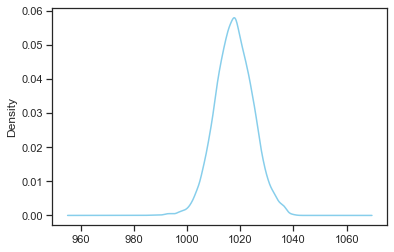

Density plot for feature number 15


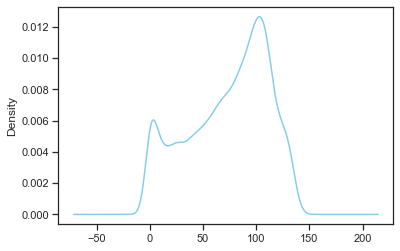

Density plot for feature number 16


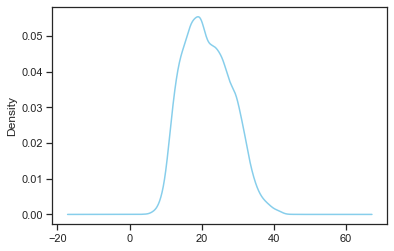

Density plot for feature number 17


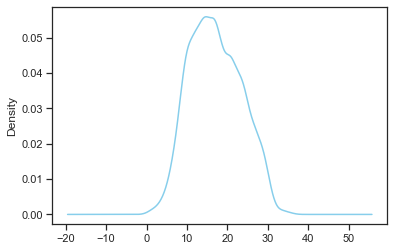

Density plot for feature number 20


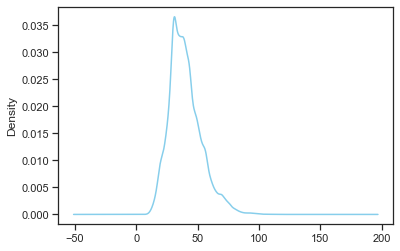

Density plot for feature number 21


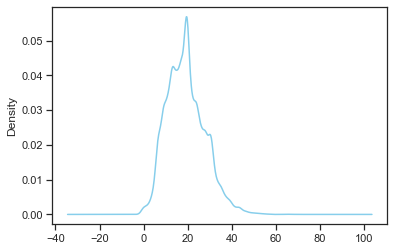

Density plot for feature number 22


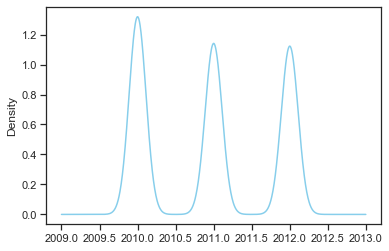

Density plot for feature number 23


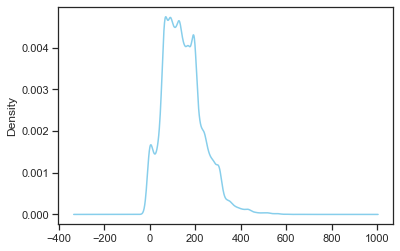

Density plot for feature number 24


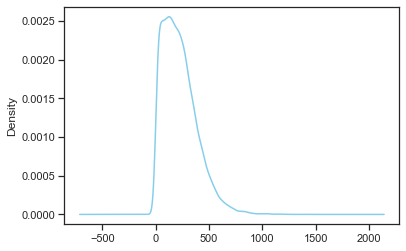

Density plot for feature number label


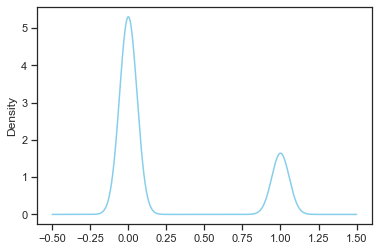

In [15]:
def get_density(data):                                             
    for category in data.columns[:]:                                  # All The columns 
        if (data[category].dtype!=object):                            # For all the coulmuns excpet columns from object type
            print ('Density plot for feature number',category)           # We will know the current feature
            data[category].plot.kde(color = "skyblue")               # Plot and show
            plt.show()
get_density(data)

Show density graph for each pair of numeric columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B37FBDE108>,
      dtype=object)

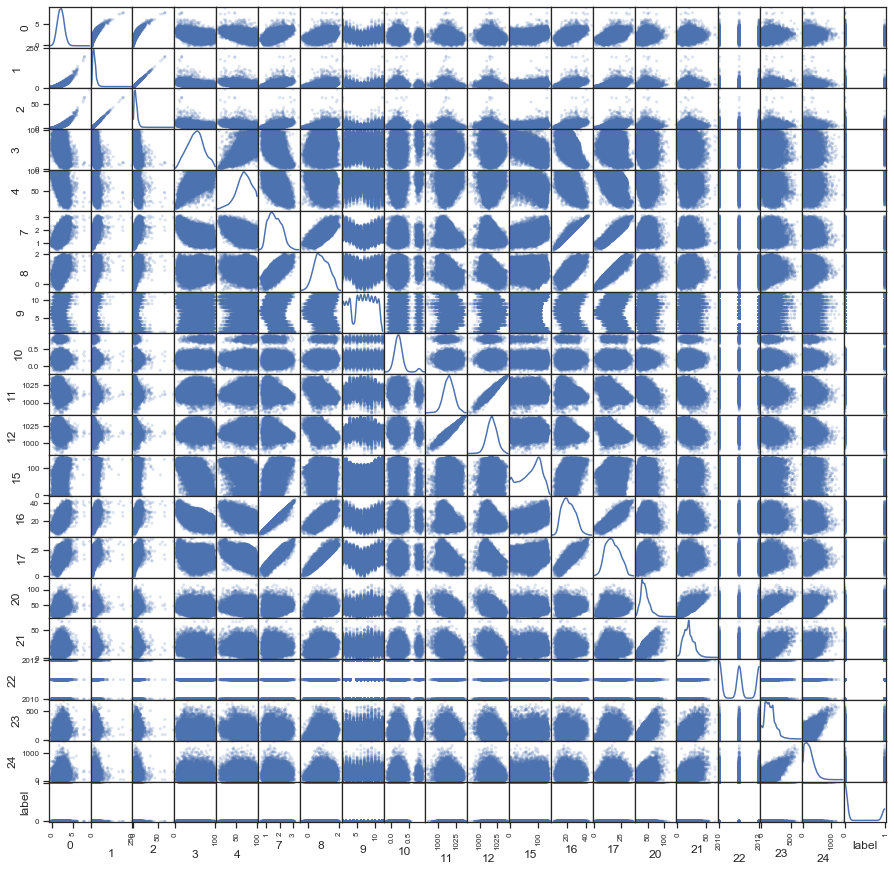

In [16]:
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='kde')

##### Distribute the data to features and labels and comparing the number of tags to 0 and 1

This function get data and divide it into 2 lists: 1- for all the features we have 2- for all the labels for each row.

In [17]:
def get_data_labels(data):
    features=data.loc[:, data.columns != 'label']      # Get the columns of all the feature except the labels  
    labels_row=data.loc[:,data.columns =='label']      # Get the label column
    return features,labels_row

This function get the list with the labels and count the number of '0' label and '1' label. Finally it plot a pie chart with these count for visualization.

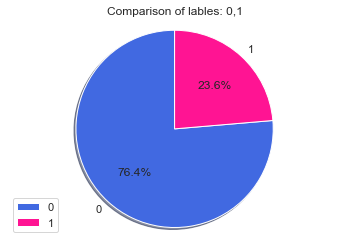

In [18]:
def showlabelpie(labels_row):
    lable_0=np.count_nonzero(labels_row==0)                            # The number of 0 label
    lable_1=np.count_nonzero(labels_row==1)                            # The number of 1 label
    labels = '0', '1'                                                  # Save the name of the labels
    sizes = [lable_0,lable_1]
    color=["royalblue","deeppink"]                                     
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels,colors=color, autopct='%1.1f%%',      # Create pie chart for the comparison
            shadow=True, startangle=90)
    ax1.axis('equal')                                                  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Comparison of lables: 0,1')                             # Add a title
    plt.legend(labels,loc=3)                                           # Add legend for the plot
    plt.show()
    
labels_row=get_data_labels(data)[1]
showlabelpie(labels_row)

##### Check if there are duplicates in the data set and how many there are- so we know if we need to deal with it in the pre-processing.

This function check on a copy of the data the numer of the rows after drop duplicate row. Finally it show the number of duplicate row.

In [19]:
def show_duplicate(dataframe):
    data_copy=dataframe.copy()                                              # Make a copy                    
    shape1=data_copy.drop_duplicates().shape                                # Check if there are duplicates and save tha shape
    shape=data.shape                                                        # The shape of the original data
    print ('The shape of the original data is:',shape)
    print ('The shape of the copy data withput duplicates is:',shape1)
    duplicates_row=shape[0]-shape1[0]                                       # Calculate how many duplicates we have
    print ('The number of duplicates rows is:',duplicates_row)
    
show_duplicate(data)

The shape of the original data is: (22161, 26)
The shape of the copy data withput duplicates is: (22161, 26)
The number of duplicates rows is: 0


#### Check which columns are categorical and which columns are numeric.

This function get the data and divide it into 2 lists: 1-list of the numeric columns 2-list of the categorial column.

In [20]:
def Divide_data_by_type(dataframe):
    number_cols=list(dataframe.columns[dataframe.dtypes != 'object'])        # Save the index of each numeric columns
    category_cols=list(dataframe.columns[dataframe.dtypes == 'object'])      # Save the index of each category columns
    print ('The categorial columns are:',category_cols)
    print ('The numerical columns are: ',number_cols)
    return number_cols,category_cols

Types=Divide_data_by_type(data)

The categorial columns are: ['5', '6', '13', '14', '18', '19']
The numerical columns are:  ['0', '1', '2', '3', '4', '7', '8', '9', '10', '11', '12', '15', '16', '17', '20', '21', '22', '23', '24', 'label']


##### Show the Box-Plot for each numerical feature

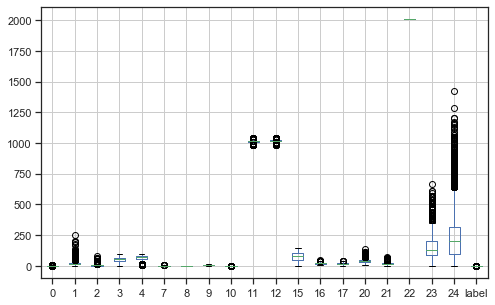

In [21]:
def ShowBoxPlot(dataframe):                               # Show all the Box-Plot for each columns in 1 plot
    fig, ax =plt.subplots(figsize=(8, 5))                         
    dataframe.boxplot()
    
ShowBoxPlot(data)

We create one plot for all the numerical columns so we didn't need this plot

In [22]:
# for column in data:                
#     if (data[column].dtype!=object):
#        plt.figure()
#        data.boxplot([column])

##### Show plots for the categorial columns to explore them also- we will count the number of each value for each column.

This function get data and for each categorial column it count number of each value and create a plot.

This is histogram for categorial feature number: 5


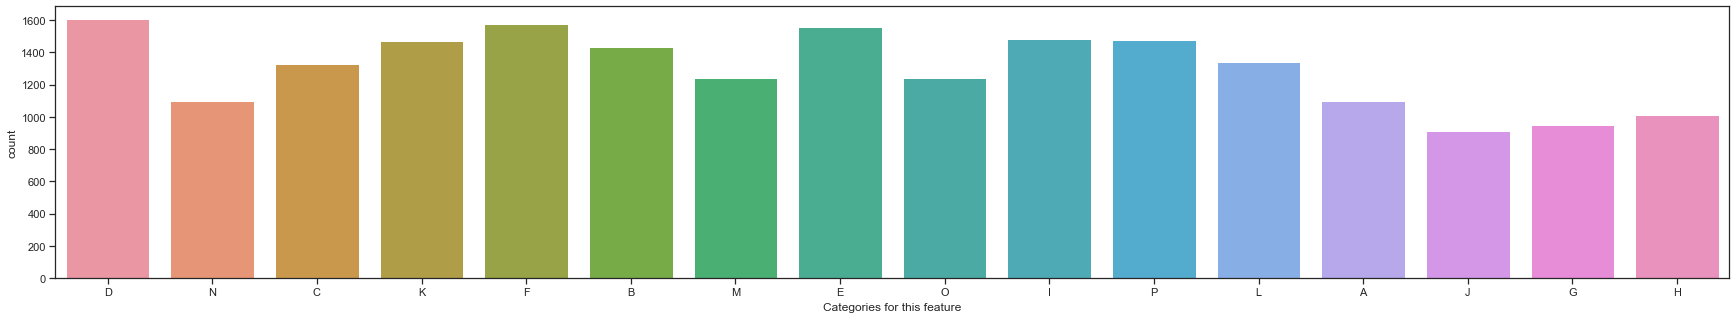

This is histogram for categorial feature number: 6


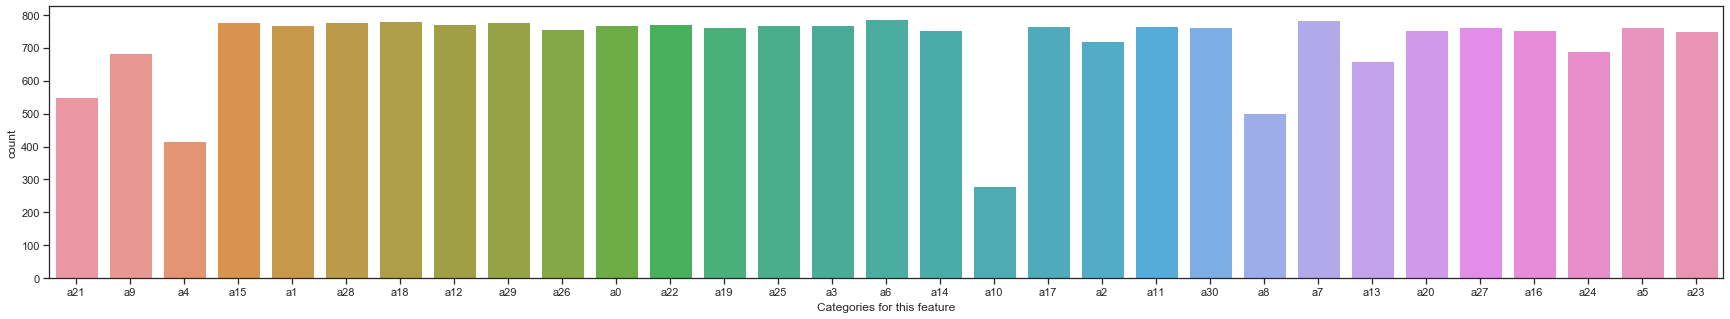

This is histogram for categorial feature number: 13


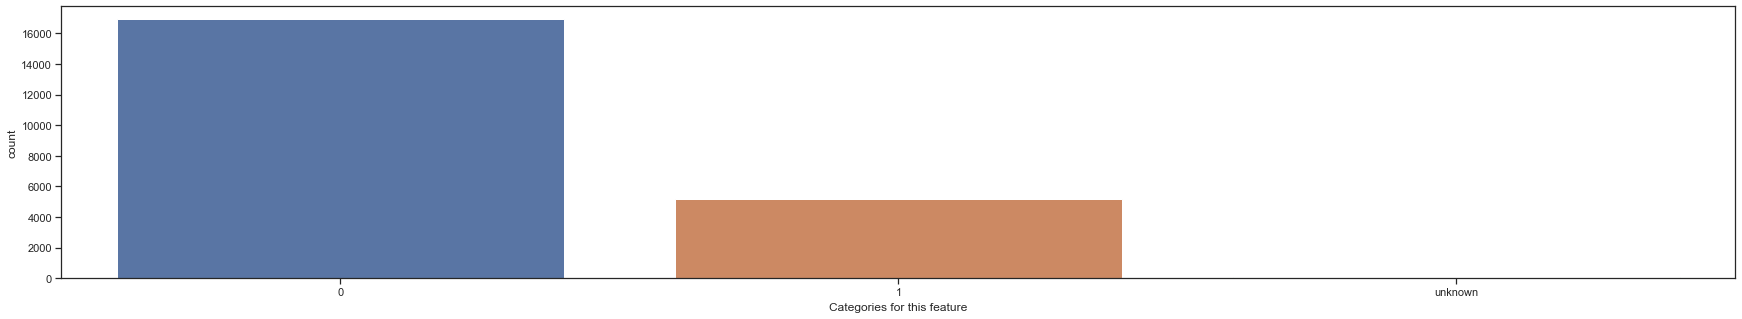

This is histogram for categorial feature number: 14


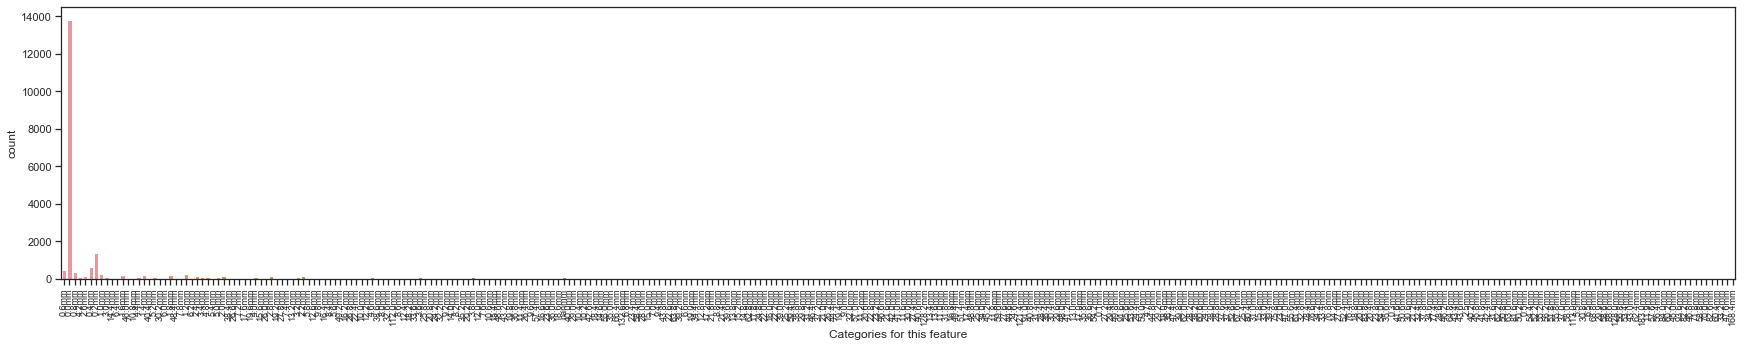

This is histogram for categorial feature number: 18


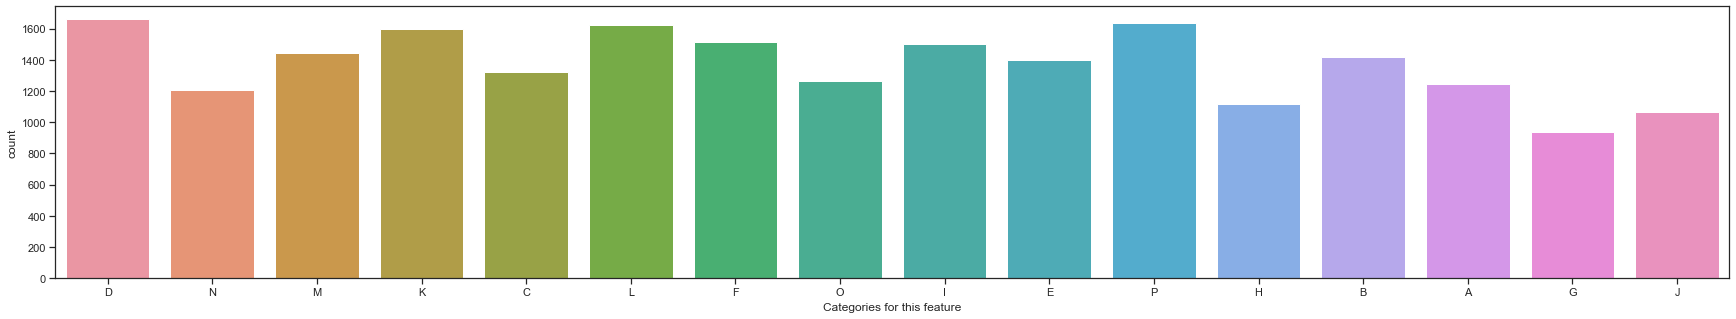

This is histogram for categorial feature number: 19


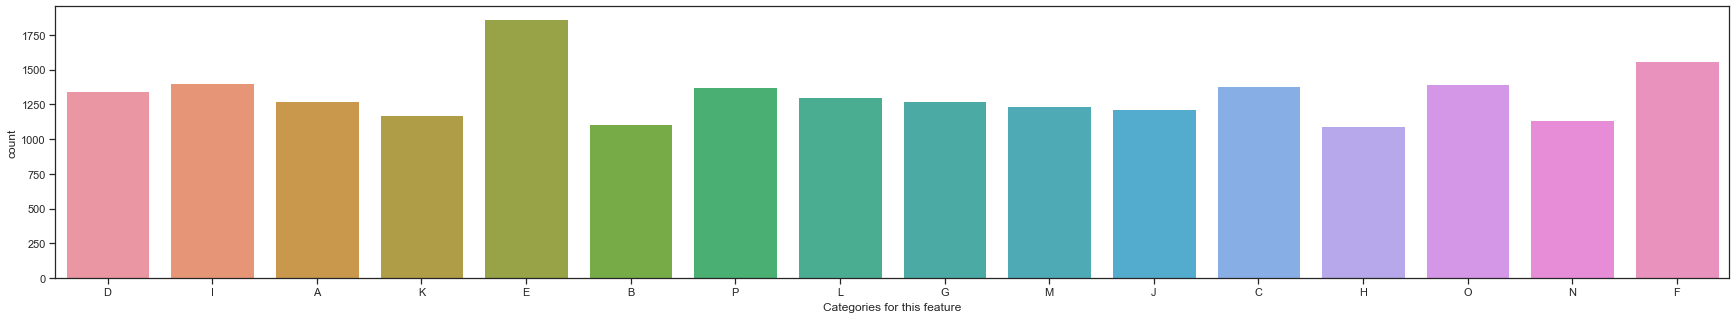

In [23]:
def ShowCategorialPlots(dataframe):
    for column in dataframe:                                                         # For each catedgorial column we will show an histogram
        if (dataframe[column].dtype==object):
            print ('This is histogram for categorial feature number:',column)
            fig, ax =plt.subplots(figsize=(30, 5))                                   # Define the size of the plots
            sns.countplot(dataframe[column])                                         # The histogram plot
            if column=='14':                                                         # Arrange the headlines only for this column
                ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=9)
            ax.set(xlabel='Categories for this feature')                             # Add lable for X-axis
            plt.show()                                                               # Show the plot

ShowCategorialPlots(data)

_______________________________
# Part 2-  Pre-Processing
In pre-processing, we will perform operations on the data so that we can finally extract a model. We will remove outliers, normalize the data, handle missing data, reduce dimensionality, build new features and apply the processing to the test set.

--------------------------------------------------------------------------------------------------------

## Zscore- removing outliers
Already in the data exploration phase we saw through the box plot that there may be outliers values. So we will check by the Z score function for each column separately if it has values that exceed 4 std. And if we do, we will take them down. Finally, we will make sure that we have not removed too much of the data as this will impair the model training. In preprocessing we saw that we dropped 2.23% and still have a lot of data left (21667 rows) and so the removing of the outliers was fine.

For first, we drop nulls from the data with numeric columns and then we get the indexes of the rows that not contain outliers- the std is less than 4 std. After that we remove the rows without outliers and get the indexes of the rows with outlier. Then we will drop the rows with outliers from the original data and Finally we calculate the proportion of the data that we remove to explore if it's fine.

In [24]:
def Zscore(DataFrame):
    df_1=DataFrame.select_dtypes(include=['float64']).dropna()               # Copy of data but without nulls
    indexes = df_1[(np.abs(stats.zscore(df_1)) < 4).all(axis=1)].index       # Got all the indexes of the rows without outliers
    rows_no_outliers = df_1.drop(indexes).index                              # Drop the indexes of the rows without outliers (save the rows with)
    df_after_outliers= DataFrame.drop(rows_no_outliers).copy()               # Drop the rows with outliers in the whole data 
    
    print(((DataFrame.shape[0]-df_after_outliers.shape[0])/DataFrame.shape[0])*100,'%  of the data is considered abnormal and we extracted it')
    return df_after_outliers,df_after_outliers['label']

We checked the option to remove outliers woth IQR, but choose to use the Z-score method. <b> we didn't use it.

In [25]:
def IQR(df):
    for column in df:
        if (df[column].dtype!=object):  
            Q1=df[column].quantile(0.25)
            Q3=df[column].quantile(0.75)
            IQR=Q3-Q1
            X = (df[column] < (Q1- 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        df=df.drop(df[X].index)
    return df

## Normalize the data
In the data exploration phase, we saw that each feature had a different scale distribution and therefore the data should be normalized. Beyond this, normalization is important as models may be affected by a greater or lesser range and this may cause bias in the results. We chose to use the Z-score normalization method to fit each feature to a standard normal distribution scale while retaining its original distribution. We will normalize the information we have only on columns from float64 type and int64 type.

This function get data frame and standart scaler object if we are on the test set. the function choose the numeric columns and create standart scaler object and fit and transform the data with it. If we are on the test set we will use the object from the train test and transform it.

In [26]:
# standard_scaler
def Normalize(Dataframe,standard_scaler=False):
    df_2=Dataframe.select_dtypes(include=['float64', 'int64'])                                                      # Create a data with the types that we want
    if not standard_scaler:
        standard_scaler = StandardScaler()                                                                          # We initialize our scaler
        standard_scaler.fit(df_2)                                                                                   # We fit our scaler 
        return pd.DataFrame(standard_scaler.transform(df_2),index=df_2.index,columns=df_2.columns),standard_scaler  # We transform our data using the scaler we have just fit. (original index)
    else:
        return pd.DataFrame(standard_scaler.transform(df_2),index=df_2.index,columns=df_2.columns)                  # We transforn our test according the train set    

We create the min-max method here, but in the accuracy measure we saw that the accuracy for it was lower. What we also learned is that it is more preferable for image processing and therefore <b>we did not use it.

In [27]:
def Normalize_minmax(Dataframe,scaler=False):
    df_2=Dataframe.select_dtypes(include=['float64', 'int64'])                                      # Create a data with the types that we want
    if not scaler:                                                                                  # If it's the train data (there is no scaler)
        scaler=MinMaxScaler()                                                                       # We initialize our scaler
        scaler.fit(df_2)                                                                            # We fit our scaler 
        return pd.DataFrame(scaler.transform(df_2),index=df_2.index,columns=df_2.columns),scaler    # We transform our data using the scaler we have just fit. (original index)
    else:
        return pd.DataFrame(scaler.transform(df_2),index=df_2.index,columns=df_2.columns)           # We transforn our test according the train set    

#### Function for contact the data if the data dividee to categorial columns from type 'object' and numerical columns.

The function get the original data and the data after some process such as the normalization. It take the categorial columns from the original data and attach it to the numerical data after some process.

In [28]:
def concat_numerical_object(data,data_norm):
    df_3=data.select_dtypes(include=['object'])                                 # Create a data with the columns from object type
    df_after_normalize = pd.concat([data_norm,df_3] , axis=1, join='inner')     # Connectors between the 2 data frames we have (categorial and numerical)         
    return df_after_normalize

## Organize the categorial data
We have seen that there are categorical columns that contain prefixes and endings in their values. Column 14 has each value 'mm' at the end of the number and for column 6, the letter 'a' has at the beginning of each number. We chose column 6 not to become a numeric column since numeric columns have importance and meaning to order and we don't know what the meaning of this column is. However, we chose column 13 to be a numeric since mm is a unit of measure throughout and it is indeed a number with importance. In addition, we noticed that columns 14 and 13 had "nanmm" and "unknown" values, respectively, and so we chose to make them 'None' because they have no meaning at all.

This function remove the perfix of the value for column '6' and get the result as a numbers.<b> We chose to not use it in the pre-processing.

In [29]:
def delete_start(string):                       # Delete the first letter from the string and return it as int
    return int(string[1:])

This function remove the ending of the value for column '14' and get the result as a numbers.

In [30]:
def delete_end(string):                          # Delete the last 2 letters from the string and return it as float
    return float(string[:-2])

Now we will organize 13 and 14 columns by change the values 'nanmm' and 'unknown' to nulls=None. The function takes the columns and the data and replace the value for each column separately.

In [31]:
def nanmm_unknown_tonull(col,data):                        # Change extraordinaries value ('nanmm','unknown') to null
    if col=='13':
        data[col]=data[col].replace('unknown', None)       # If it's the '13' col so change the 'unknown' value
    elif col=='14':
        data[col]=data[col].replace('nanmm', None)         # If it's the '14' col so change the 'nanmm' value

## Missing data
In the data exploration phase we saw that there are features for which there are missing values. So for the numeric columns we decided to fill in the median of the column and even save the median values to use for the preprocessing of the test set. And for the categorical columns we have left, we decide to take the values from the column and randomly fill in any missing value. This is because we have seen that the plots of the columns that remain are distributed fairly uniformly and that after filling several times for the purpose of making sure we see that the distribution remains the same in appearance.

This function get the data and the numeric columns and for each column that contain null values it compute the median and fill them with the median. This way we will not affect the data and fill in the missing data. In the pre-processing of the training set we will save the median we found for each column so that if we are in the pre-processing of the test set, then if the column's median in the dictionary we will extract them and if not recalculate.

In [32]:
def null_to_median(data,nums_cols,dict_value=False):                  # Fill null values with the median of each numeric column
    if not dict_value:                                                # If we are on the train set
        dict_val={}                                                   # Initialize dictionary with the median for each column in the loop
        for col in nums_cols:                                         # For each column
            num_null=data[col].isnull().sum()                         # Check if there is null value in the column
            if num_null>0:                                            # Only if there is missing values
                data[col].fillna(data[col].median(), inplace=True)    # Fill the nulls with the median of the current column
                new_num_null=data[col].isnull().sum()                 # Sum the nulls of this column after this change- we expect to see 0 nulls
                print ('For the column',col,'the number of nulls after this action is:',str(new_num_null))
                dict_val[col] = data[col].median()                    # Update the column's median in the dictionary
        return data,dict_val
    else:                                                             # If we are on the test set
        for col in nums_cols:                                         # For each column
            num_null=data[col].isnull().sum()                         # Check if there is null value in the column
            if num_null>0:                                            # Only if there is missing values
                if dict_value[col]:                                   # Check if there is meadian for this column in the dictionary
                    data[col].fillna(dict_value[col], inplace=True)   # Fill the nulls with the median of the current column
                else:                                                 # If there is no median cor this column in the dictionary, recompute it and fill
                    data[col].fillna(data[col].median(), inplace=True)
        return data

These functions will check if we have null values in the categorial columns and if so,we will randomly fill in one from the values in the column randomaly. Each null value will be full when we apply the null_to_value function on the column.<br>
In the pre-processing of the training set we will save the values we found for each column so that if we are in the pre-processing of the test set, then if the column has his values in the dictionary we will extract them and if not recalculate.

In [33]:
def null_to_value(string):                                       
    global col_lst                                               # Use the array from the null_in_categorial function
    lst_col=list(col_lst)                                        # Change the array to a list with the values of column
    if (string is np.nan):                                       # If the cell is null value              
        x=np.random.choice(lst_col)                              # Choose random value from the list
        return x                                                 # Return this choice
    else:
        return string                                            # If the cell is not null return the cell
                

In [34]:
def null_in_categorial (data,nums_category,dic_values=False): 
    global col_lst
    if not dic_values:                                              # If we are on the train set
        for col in nums_category:                                   # For each of the categorial columns
            num_null=data[col].isnull().sum()                       # Check if there is null value in the column
            if num_null>0:                                          # Only if there is missing values
                sum_col=data.groupby(col).size().reset_index()      # Group by the column and return the size
                col_lst=sum_col[col]                                # Return only the values of the column
                data[col]=data[col].apply(null_to_value)            # Apply the function on the column
                dic_for_vals={}                                     # Initialize dictionary for the values of each column with nulls
                dic_for_vals[col]=col_lst                           # update the dictionary
        return data,dic_for_vals
    else:                                                           # If we are on the test set
        for col in nums_category:                                   # For each of the categorial columns
            num_null=data[col].isnull().sum()                       # Check if there is null value in the column
            if num_null>0:                                          # Only if there is missing values
                if dic_values[col][0]:                              # If the values of this column is on the dictionary
                    col_lst=dic_values[col]                         # Save the values
                    data[col]=data[col].apply(null_to_value)        # Apply the function on the column
                else:                                               # If there is no values for this column in the dictionary
                    sum_col=data.groupby(col).size().reset_index()  # Group by the column and return the size
                    col_lst=sum_col[col]                            # Return only the values of the column
                    data[col]=data[col].apply(null_to_value)        # Apply the function on the column
        return data

## Reducing dimensionality
The problem contains 110 columns after the manipulations were done and so we should try to reduce the dimensions. The importance stems from the fact that, in a high dimension: computational complexity is high, the model training will take longer and the insights may be wrong. Also, a high dimension requires more data for training on as many possible combinations as possible, but this can result in overfitting.

We want to lower the dimensions of the problem. First, we will remove columns that are correlative, so we only keep one column of them. Then we will check if there are categorical columns that have a lot of null values-over 4.5%. Then we will remove them completely. After that we will make the categorical columns to be binary (one-hot encoding) .Finally, we'll use PCA to maximize information with as few features as we can.

This function finds the correlated pairs, it means that they have correlation higer then 0.85. Then it choose which columns from the correlations to delete and finally delete them.

In [35]:
def remove_cor(data,cols):                                             # The function finds the correlative numeric columns and leaves only one column of each correlation set
    cor_pairs=[]                                                       # Initialize list for the pairs with correlation
    cols_to_drop=[]                                                    # Initialze list for the columns that we will drop
    cor = data.corr()                                                  # Create the correlarion matrix
    for col in cols:                                                   # For each numeric column
        cor_target = abs(cor[col])                                     # Transform the corelation in specific column to the absoulute value
                                                                      
        relevant_features = cor_target[cor_target>0.85].index          # Selecting the indexes of highly correlated features (above 0.85)
        for i in relevant_features:                                    # For each coreleated index
            if col!=i:                                                 # Only if the index is not the column 
                if (col,i) not in cor_pairs:                           # If we haven't yet added this pair to the list
                    if (i,col) not in cor_pairs:                       # If we haven't yet added this opposite pair to the list (same meaning)
                        cor_pairs.append((col,i))                      # Append the pair to the cor_pairs list
    print ('\nThe coorelated pairs that we have found are:',cor_pairs) # Print the correleted pairs
    
    # Check which columns we have to drop according the correlations
    
    for pair in cor_pairs:                                             # For each correlated pairs that we found
        if pair[0] not in cols_to_drop:                                # If the first column not in columns to drop
            cols_to_drop.append(pair[0])                               # Add the columns to the columns that we will drop
    print ('\nThe feature that we will drop beacuse the correlations are:',cols_to_drop)     # Print the columns that we will drop
    
    df_after_cor=data.drop(cols_to_drop, axis=1)                       # Drop the columns that we found from the data that we have
    return df_after_cor,cols_to_drop

This function checks only the categorial columns. It checks if there is a column that conatins above 4.5% (treshold) of null values, and if yes it delete the column from the data.
In our opinion columns containing a large amount of missing values cannot be filled in the categorical columns which we do not understand very well their meaning. And so we prefer not to cause bias in the models.

In [36]:
def check_nulls_categorial(data,cols,treshold):
    cols_to_drop=[]                                               # Initialize a list for the columns that we will drop
    shapes=data.shape[0]                                          # Save the number of rows in the original data in the input
    for col in cols:                                              # For each categorial column
        nulls=data[col].isnull().sum()                            # Sum the null values
        nulls_data= nulls/shapes                                  # Checks the percent of null values from the total data
        print ('For categorial columns number',col,'the sum of the nulls is:',nulls,'This is',nulls_data,'%  of the data.')
        
        if nulls_data>treshold:                                   # If the precent is above than the treshold
            cols_to_drop.append(col)                              # Append the column to the drop list
    print ('The following columns contain too many null values:',cols_to_drop)
    
    new_data=data.drop(cols_to_drop, axis=1)                      # Drop the columns that we found
    return (new_data,cols_to_drop)
        
        

#### One-hot encoding

We will transform the categorical features to binary ("one-hot encoding") so the models can deal with all the columns as numeric. The function get data and categorial columns and apply the get_dummies method. It return the data without the categorial columns but with the dummies that we created.

In [37]:
def dummies(data,cols):
    categorial_data=data.loc[:,cols]                                  # Save the data only for the categorial columns
    dummies_data=pd.get_dummies(categorial_data)                      # Change the categorial columns to binary
    all_data=pd.concat([data, dummies_data], axis=1)                  # Attach the original data in the input with the binaries columns
    data_after_dummies= all_data.drop(categorial_data, axis=1)        # Delete the original categorial columns
    return data_after_dummies


#### PCA
We want to select features that have values with maximum variance explained by the PCA. The method is effective because when we restore the original vector it may lose information but it is assured that we will lose as little information as possible and hence the total square error will be the minimum. The function will first create a plot that visually represents the cumulative explained variance and then create a PCA object with the cumulative covariance explained that choosen(with us 95%). The function will run on the numeric and categorical columns separately but with the same function. We saw in the preprocessing that we lowered the dimension from 110 features to 82 which means we managed to keep most of the information with far fewer columns. The function get the data, the relevant columns (numeric/categorial), treshold for the variance and pca varaiblefor the test set so we can apply the pca at the same way as we do on the train set.

In [38]:
def pca_cols (data,cols,threshold,pca=False):  
    relevant_data=data.loc[:,cols]                                      # Save the data only for the numeric columns
    if not pca:
        pca_num=PCA(n_components=relevant_data.shape[1])                # Initialize PCA object
        pca_num=pca_num.fit(relevant_data)                              # Fit the model with the data
        pca_exp=pca_num.explained_variance_ratio_                       # Percentage of variance explained by each of the selected components

        print ('\n\nFor visualization this is the cumulative explained variance plot for each numeric column')
        plt.plot(np.cumsum(pca_exp), color='blueviolet')               # Plot for visualozation- the number of components vs cumulative explained variance
        plt.xlabel('number of components')                             # Add title for x-axis
        plt.ylabel('cumulative explained variance')                    # Add title for y-axis
        plt.grid()                                                     # Add grid for the plot
        plt.show()                                                     # show the plot

        print ('\nNow we apply the pca that will explain at least ',threshold*100,' %')
        pca=PCA(threshold)                                             # Initialize PCA object that will explain 0.995 
        pca=pca.fit(relevant_data)                                     # Fit the model with the data
        pca_explain=pca.explained_variance_ratio_                      # Percentage of variance explained by each of the selected components
        print ('\nThe cumulative explained variance for this pca action is:',sum(pca_explain))
        data_after_pca=pd.DataFrame(pca.transform(relevant_data))      # Apply the PCA on the train data 
        return data_after_pca,pca
    else:
        data_after_pca=pd.DataFrame(pca.transform(relevant_data))      # Apply the PCA on the test data 
        return data_after_pca
        

## Create new features
We want to manipulate the features mathematically so that we can say new features that will make the model better practice and thus predict better. We don't know what each column of the data contains in terms of meaning and so we chose to look at columns that are correlative with the label column (Top 5) and more top 4 columns in their correlations and that they must run the PolynominalFeatures method.

This function get the data, numeric columns and columns to manipulate and apply the method that get all the combinations between the numeric columns and another column that contains only '1'. Finally it returns the new data and the columns that choose in the train set so we apply this at the same way on the test set.

In [39]:
def new_features (cols, data,cols_rand,normal_test=False):         
    categorial=data.select_dtypes(include=['uint8'])          # Save the categorial data
    numeric=data.loc[:,cols_rand]                             # save the numeric data acorrding to the cols_rand list
    poly=PolynomialFeatures(2)                                # Create poly object
    new=poly.fit_transform(numeric)                           # Create new features with the columns
    data_new=(pd.DataFrame(new,index=data.index)).iloc[:,1:]  # Drop the first column
    if not normal_test:
        data_new,new_normal_test=Normalize(data_new)          # Normalize the new features
    else:
        data_new=Normalize(data_new,normal_test)
    update_numeric=data.loc[:,cols]                           # Save the numeric data
    update_numeric=update_numeric.drop(cols_rand,axis=1)      # Drop cols_rand
    all_data=pd.concat([update_numeric,data_new, categorial], axis=1)   # Attach the categorial data with the new features (include the original numeric columns)                          
    return (all_data,cols_rand,normal_test)

This is the function we would use if we were to choose the columns that we randomly manipulate. We chose not to do so because in this way the accuracy measure was greatly influenced by the selected columns in each run. <b> We didn't use this.

In [40]:
def new_features_random (cols, data,done_cols=False):         
    categorial=data.select_dtypes(include=['uint8'])         # Save the categorial data
    if not done_cols:                                  
        cols_rand=[]
        while len(cols_rand)<3:                              # Fill the cols_rand list until there are 3 different columns that chosen randomaly
            col=random.choice(cols)
            if col not in cols_rand:
                cols_rand.append(col)
    else:
        cols_rand=done_cols
    numeric=data.loc[:,cols_rand]                             # save the numeric data acorrding to the cols_rand list
    poly=PolynomialFeatures(2)                                # Create poly object
    new=poly.fit_transform(numeric)                           # Create new features with the columns
    data_new=(pd.DataFrame(new,index=data.index)).iloc[:,1:]  # Drop the first column
    update_numeric=data.loc[:,cols]                           # Save the numeric data
    update_numeric=update_numeric.drop(cols_rand,axis=1)      # Drop cols_rand
    all_data=pd.concat([update_numeric,data_new, categorial], axis=1)   # Attach the categorial data with the new features (include the original numeric columns)                          
    return (all_data,cols_rand)

___________________________
## Pre-Proccesing for the train data
Now we will use all of the functions we created above to do pre-processing on the training set.

In the beginning we create a copy for the data. Then we will deal with the columns that we want to change, namely to add prefixes and endings, change values to None and column 22 containing years we became an object and not a numeric. After that we apply the following process: remove outliers --> normalize the data --> concat the data with object --> divide the data to features, numeric columns and categorial columns --> fill missing value within the median for numeric columns --> check the histograms (because we apply normalization) and the heat map --> remove correlated columns --> remove categorial dolumns with a lot of null --> divide the data again to features, numeric columns and categorial columns because we done some process --> fill missing values in categorial columns (randomaly from column's value) --> transform the categorial columns to numeric --> create new features --> update the numeric columns and the categorial columns (that transform to numeric) --> apply PCA on the numeric columns and categorial columns separeately --> concat the data after the 2 PCA process --> reset index to the labels --> The train set is ready! 

In [41]:
np.random.seed(300)

In [42]:
def main_preproccesing(data):   
    copy_data=data.copy()                                                                             # Make a copy for tha data
    copy_data['22']=copy_data['22'].astype('object')                                                  # change this column's type to object
    # copy_data['9']=copy_data['9'].astype('object')
    copy_data['14']=copy_data['14'].apply(delete_end)                                                 # Delete the last 2 letters from the strings in 14 columns
    # copy_data['6']=copy_data['6'].apply(delete_start) 
    nanmm_unknown_tonull('13',copy_data)                                                              # Change the 'unknown' values 
    nanmm_unknown_tonull('14',copy_data)                                                              # Change the 'nanmm' values
    # After the changes on 14 column, we want to check that his type changed in accordance.
    print ('\nThe type of 14 column after the change is:',copy_data['14'].dtypes,'\n')                # Check the type again
    print ('--------------------------------------------------------------------------------------------------------------')
   
    print ("In the Zscore proccess we got:")
    df_after_outliers,labels=Zscore(copy_data)                                                        # Remove outliers from numerical columns, and save the final lables
    df_after_normalize,scaler=Normalize(get_data_labels(df_after_outliers)[0])                        # Normalize the numerical data
    df_after_normalize=concat_numerical_object(copy_data,df_after_normalize)                          # Conact the normael numerical columns with the categorial columns
   
    feature=get_data_labels(df_after_normalize)[0]                                                    # Split tha data to features and the labels and thake the features
    num,categorial=Divide_data_by_type(feature)                                                       # Get the numbers of numerical/object columns
    print ('--------------------------------------------------------------------------------------------------------------')
    print ('\nNow we will show that all the numeric columns that had nulls, now there is no null')
    df_after_normalize,dict_value=null_to_median(df_after_normalize,num)                              # Fill nulls in numeric columns
    
    print ('\n#################################################### Visualization ####################################################\n')
    print ('\nNow we will show the histogram plots after these proccessing\n')
    get_histogram(df_after_normalize)                                                                 # Show histogram plots after the changes on tha data
    print ('\nVisualization for the correlations between the data pairs after removing outliers and normalization to see which columns can be excluded in the analysis due to sufficiently high correlation\n')
    showheatmap(df_after_normalize)                                                                   # Show heat map plot after the changes on tha data
    
    print ('\n############################################ Reducing dimensionality ##########################################\n')
    print ('\nTake a look at the correlation table which correlations are higher than 0.85 in both the positive and negative \ndirections. And we will only see the numbers for this condition so we can visually see the correlations conveniently.\n')
    print (df_after_normalize.corr()[abs(df_after_normalize.corr())>0.85])
    df_after_cor,cols_to_drop=remove_cor(df_after_normalize,num)                                     # Remove pairs with high correlation
    print ('\nWe will check that the correlative columns are indeed thrown')
    print (list(df_after_cor))                                                                       # Check that we droped the correct columns
    print ('--------------------------------------------------------------------------------------------------------------')
    print ('\nNow we will show the categorial columns with a lot of null values and which columns to drop')
    new_data,category_to_drop=check_nulls_categorial(df_after_cor,categorial,0.045)                  # Delete categorial columns with a lot of nulls (at least 4.5% of the data)
    print ('--------------------------------------------------------------------------------------------------------------')
    print ('\nWe show the changes in the data: features, lable, numeric columns and categorial columns')
    new_feature=get_data_labels(new_data)[0]                                                         # Get the new lists of features and lables and thake the features
    new_num,new_categorial=Divide_data_by_type(new_feature)                                          # Get the new lists of numeric columns and categorial coumns
    
    new_data, vals_category=null_in_categorial (new_data,new_categorial)                             # Fill nulls in categorial columns
    print ('\nNow we can see that there is no null:')                                                # Check that ther is no null in the data now
    print (new_data.isnull().sum())
    print ('--------------------------------------------------------------------------------------------------------------')
    data_after_dummies=dummies (new_data,new_categorial)                                             # Change the cetegorial columns to binary
    print ('\nThis is the columns that we have after use one-hot encoding (delete columns and change categorial to binary)')
    print (list(data_after_dummies))                                                                 # Check what is the new columns after this change
                                                                      
    data_new_num_feture,cols_Rand,normal_test=new_features(new_num,data_after_dummies,['3','4','10','12','15','2','17','20','21'])  # Create new features and save the new data and the columns that we do manipulation on them - cols with the maximum correlation with the lable
    print ('--------------------------------------------------------------------------------------------------------------')
    update_num=list(data_new_num_feture.select_dtypes(exclude=['uint8']))                            # Save all the columns without the dummies
    data_after_pca_num,pca_num=pca_cols(data_new_num_feture,update_num,0.95)                         # Apply PCA on the numeric data
    print ('\nThis is the numeric data that we still have after PCA:')                               # Show the numeric data that we have now
    print (data_after_pca_num)
    
    update_categorial=list(data_new_num_feture.select_dtypes(include=['uint8']))                     # Update the categorial columns after the one-hot encoding
    data_after_pca_categorial,pca_categorial=pca_cols(data_new_num_feture,update_categorial,0.95)    # Apply PCA on the categorial data
    print ('\nThis is the categorial data that we still have after PCA:')                            # Show the categorial data that we have now
    print (data_after_pca_categorial)
    
    final_data=pd.concat([data_after_pca_num,data_after_pca_categorial] , axis=1)                    # Attach the categorial data and numeric data after pca
    labels.reset_index(drop=True, inplace=True)                                                      # reset the index of the labels to be the same as the data
    return scaler,cols_to_drop,category_to_drop, pca_num, pca_categorial,final_data,labels,cols_Rand,dict_value, vals_category,normal_test

We apply the pre processing function on the train data and save varaibles for the test pre processing so it be the same as the train set.


The type of 14 column after the change is: float64 

--------------------------------------------------------------------------------------------------------------
In the Zscore proccess we got:
2.229141284238076 %  of the data is considered abnormal and we extracted it
The categorial columns are: ['5', '6', '13', '18', '19', '22']
The numerical columns are:  ['0', '1', '2', '3', '4', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '20', '21', '23', '24']
--------------------------------------------------------------------------------------------------------------

Now we will show that all the numeric columns that had nulls, now there is no null
For the column 3 the number of nulls after this action is: 0
For the column 4 the number of nulls after this action is: 0
For the column 7 the number of nulls after this action is: 0
For the column 8 the number of nulls after this action is: 0
For the column 11 the number of nulls after this action is: 0
For the column 12 the number 

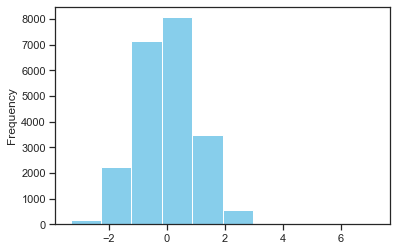

Histogram for feature number 1


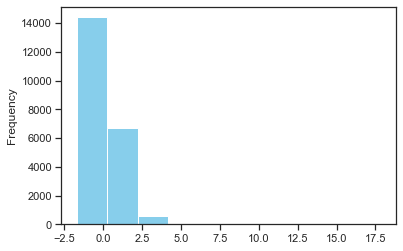

Histogram for feature number 2


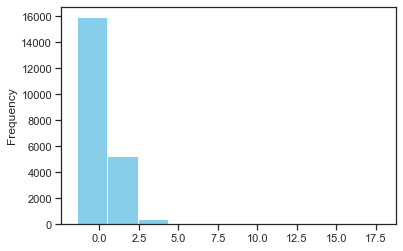

Histogram for feature number 3


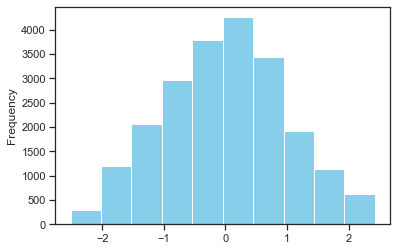

Histogram for feature number 4


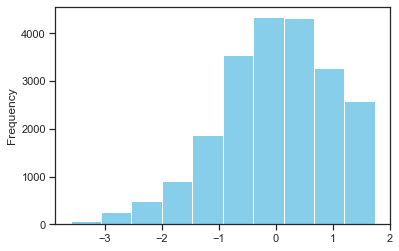

Histogram for feature number 7


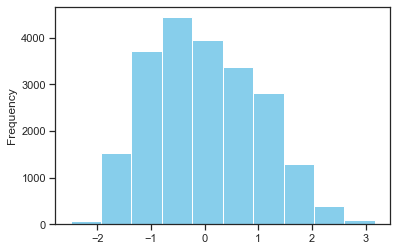

Histogram for feature number 8


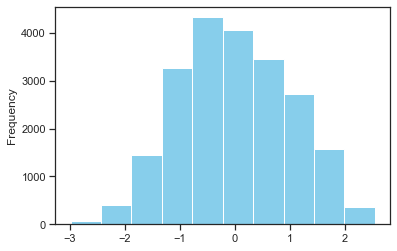

Histogram for feature number 9


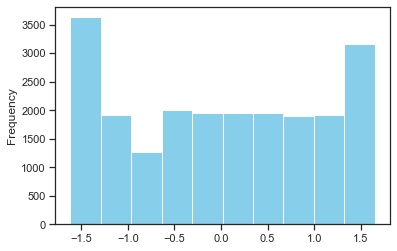

Histogram for feature number 10


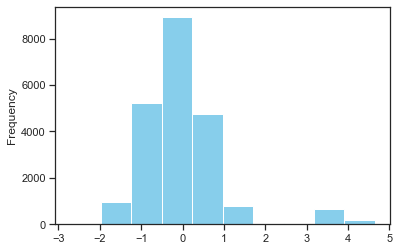

Histogram for feature number 11


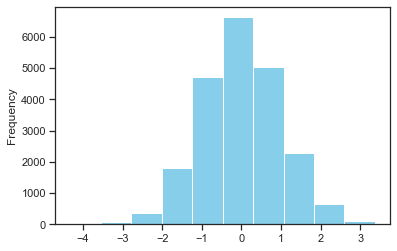

Histogram for feature number 12


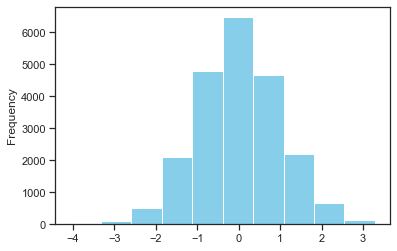

Histogram for feature number 14


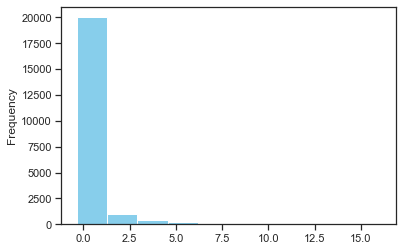

Histogram for feature number 15


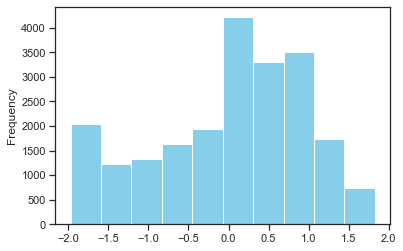

Histogram for feature number 16


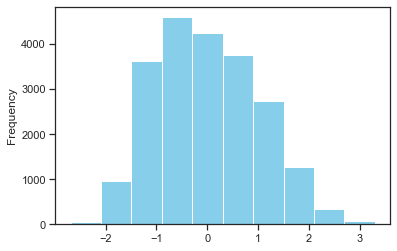

Histogram for feature number 17


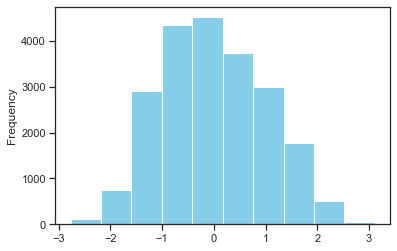

Histogram for feature number 20


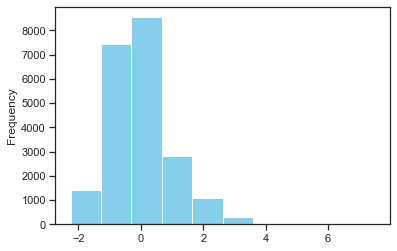

Histogram for feature number 21


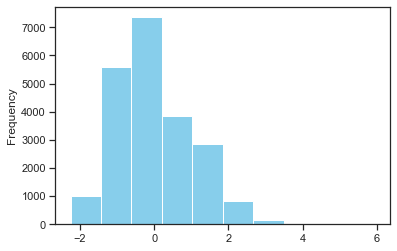

Histogram for feature number 23


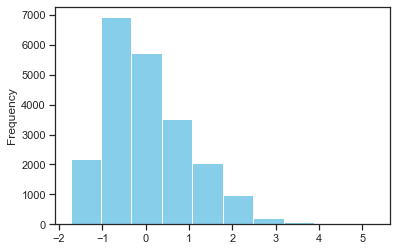

Histogram for feature number 24


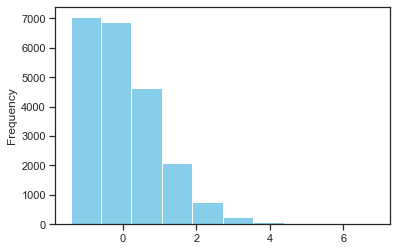


Visualization for the correlations between the data pairs after removing outliers and normalization to see which columns can be excluded in the analysis due to sufficiently high correlation



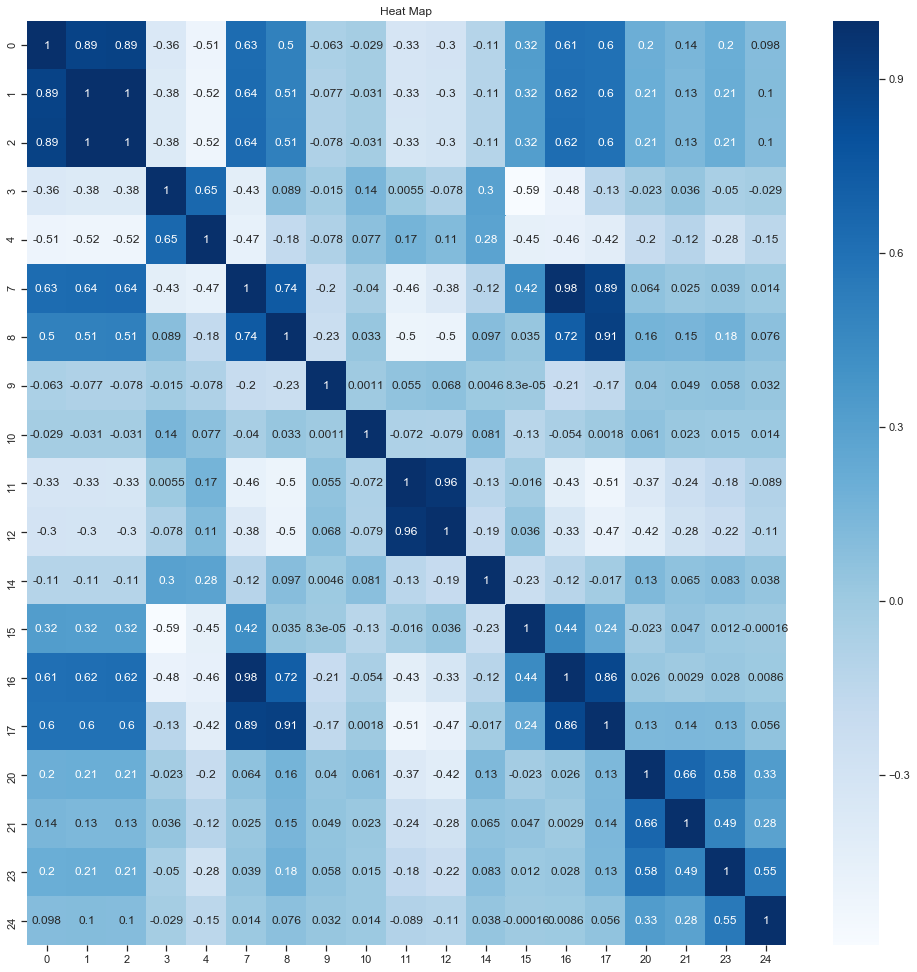


############################################ Reducing dimensionality ##########################################


Take a look at the correlation table which correlations are higher than 0.85 in both the positive and negative 
directions. And we will only see the numbers for this condition so we can visually see the correlations conveniently.

           0         1         2    3    4         7         8    9   10  \
0   1.000000  0.887303  0.891556  NaN  NaN       NaN       NaN  NaN  NaN   
1   0.887303  1.000000  0.995134  NaN  NaN       NaN       NaN  NaN  NaN   
2   0.891556  0.995134  1.000000  NaN  NaN       NaN       NaN  NaN  NaN   
3        NaN       NaN       NaN  1.0  NaN       NaN       NaN  NaN  NaN   
4        NaN       NaN       NaN  NaN  1.0       NaN       NaN  NaN  NaN   
7        NaN       NaN       NaN  NaN  NaN  1.000000       NaN  NaN  NaN   
8        NaN       NaN       NaN  NaN  NaN       NaN  1.000000  NaN  NaN   
9        NaN       NaN       NaN  NaN  NaN    

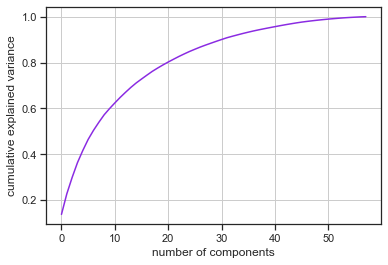


Now we apply the pca that will explain at least  95.0  %

The cumulative explained variance for this pca action is: 0.9521380462957391

This is the numeric data that we still have after PCA:
             0         1         2         3         4         5         6   \
0      3.246947 -0.852398  2.374779 -6.608652 -1.707005 -3.770372 -4.901396   
1     -0.493425 -1.539462  5.456379  4.341216 -1.149462 -0.180004 -1.005070   
2      4.381995 -5.819764  2.217293 -0.472414  1.925909  0.555339  0.644869   
3     -1.545017 -0.685309 -1.195050  0.110333 -0.148510 -0.071098 -0.527687   
4     -0.789817 -0.374971 -1.979466 -0.110222  0.200091 -0.561990 -0.762827   
...         ...       ...       ...       ...       ...       ...       ...   
21662 -1.040278 -1.955230 -0.932767 -0.135696  0.749466  0.023121  0.417640   
21663 -1.423114 -1.420034 -0.198728  0.567494  0.694769 -0.315241  0.080794   
21664  0.229229  0.911983 -0.180835  0.021528 -0.306538  2.922771  0.492605   
21665 -0.693006  3

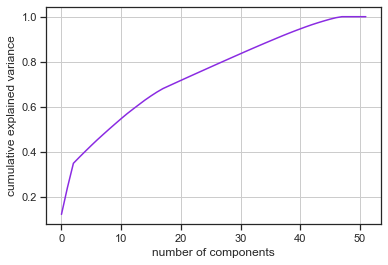


Now we apply the pca that will explain at least  95.0  %

The cumulative explained variance for this pca action is: 0.9555539874422418

This is the categorial data that we still have after PCA:
             0         1         2         3         4         5         6   \
0     -0.378917  0.344062 -0.710526 -0.692687 -0.425898 -0.508549  0.059392   
1     -0.592206  0.123642  0.662462 -0.001786  0.005404  0.064148  0.036258   
2     -0.620381  0.114782  0.650070  0.175510 -0.079867  0.034261  0.111780   
3      0.176143 -0.798771 -0.086303 -0.247299 -0.081310  0.592776 -0.630598   
4     -0.413427  0.331842 -0.728463  0.095660  0.030734  0.058540  0.222574   
...         ...       ...       ...       ...       ...       ...       ...   
21662  1.337805 -0.121839  0.183152 -0.621140 -0.412963 -0.455694  0.097715   
21663 -0.586678  0.129246  0.666476  0.076645  0.007118  0.083512  0.117171   
21664  0.564467  0.799136  0.925895 -0.064795  0.116553 -0.035457 -0.010318   
21665  1.321578

In [43]:
scaler,cols_to_drop,category_to_drop, pca_num, pca_categorial,final_train_data,train_lables,cols_Rand,dict_value, vals_category,normal_test=main_preproccesing (data)

## Pre-Proccesing for the test data
We will also apply the pre-processing to the test set, but with minor changes. It will get parameters from the pre-processing of the train set and use them. First, we will not remove outliers because we do not want to remove rows from the test set that we want to predict in the future. In addition, if we removed columns in the train set, we would like to remove those columns exactly in the test set.Also for the missing values ​​we filled in we used the same values ​​we filled in from the training set to adjust the test set to it. so the function received additional parameters from the previous pre-processing.

In [44]:
def main_preproccesing_test(test, scaler, cols_to_drop,category_to_drop,pca_num, pca_categorial,cols_Rand, vals_category,normal_test):   
    copy_test=test.copy()                                                                           # Make a copy for tha data
    copy_test['22']=copy_test['22'].astype('object')                                                # change this column's type to object 
    #copy_test['9']=copy_test['9'].astype('object')
    copy_test['14']=copy_test['14'].apply(delete_end)                                               # Delete the last 2 letters from the strings in 14 columns
    # copy_data['6']=copy_data['6'].apply(delete_start)
    nanmm_unknown_tonull('13',copy_test)                                                            # Change the 'unknown' values 
    nanmm_unknown_tonull('14',copy_test)                                                            # Change the 'nanmm' values
    
    df_after_normalize=Normalize(copy_test,scaler)                                                  # Normalize the numerical data
    df_after_normalize=concat_numerical_object(copy_test,df_after_normalize)                        # Conact the normal numerical columns with the categorial columns
    num,categorial=Divide_data_by_type(df_after_normalize)                                          # Get the numbers of numerical/object columns

    print ('\nNow we will show that all the numeric columns that had nulls, now there is no null')
    df_after_normalize=null_to_median(df_after_normalize,num,dict_value)                            # Fill nulls in numeric columns
    
    print ('\n############################################ Reducing dimensionality ##########################################\n')
    df_after_cor=df_after_normalize.drop(cols_to_drop, axis=1)                                      # Remove the same numeric columns that we remove on the train data when we checked the correlation
    new_data=df_after_cor.drop(category_to_drop, axis=1)                                            # Remove the same caegorial columns that we remove on the train data when we checked the categorial columns
    
    print ('\nWe show the changes in the data: features, lable, numeric columns and categorial columns')
    new_num,new_categorial=Divide_data_by_type(new_data)                                            # Get the new lists of numeric columns and categorial coumns

    null_in_categorial (new_data,new_categorial, vals_category)                                     # Fill nulls in categorial columns
    data_after_dummies=dummies (new_data,new_categorial)                                            # Change the cetegorial columns to binary

    data_new_num_feture=new_features(new_num,data_after_dummies,cols_Rand,normal_test)[0]                       # Create new features
    update_num=list(data_new_num_feture.select_dtypes(exclude=['uint8']))                           # Save all the columns without the dummies
    data_after_pca_num=pca_cols(data_new_num_feture,update_num,0.95,pca_num)                        # Apply PCA on the numeric data
    update_categorial=list(data_new_num_feture.select_dtypes(include=['uint8']))                    # Update the categorial columns after the one-hot encoding
    data_after_pca_categorial=pca_cols(data_new_num_feture,update_categorial,0.95,pca_categorial)   # Apply PCA on the categorial data
    
    final_data=pd.concat([data_after_pca_num,data_after_pca_categorial] , axis=1)                   # Attach the categorial data and numeric data after pca
    return final_data

We apply the pre processing function on the test data and save the data after these process.

In [45]:
final_test_data=main_preproccesing_test(test, scaler, cols_to_drop,category_to_drop,pca_num, pca_categorial,cols_Rand, vals_category,normal_test)

The categorial columns are: ['5', '6', '13', '18', '19', '22']
The numerical columns are:  ['0', '1', '2', '3', '4', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '20', '21', '23', '24']

Now we will show that all the numeric columns that had nulls, now there is no null

############################################ Reducing dimensionality ##########################################


We show the changes in the data: features, lable, numeric columns and categorial columns
The categorial columns are: ['6', '13', '18', '22']
The numerical columns are:  ['2', '3', '4', '9', '10', '12', '14', '15', '17', '20', '21', '23', '24']


_____________________________
# Part 3- Running models
Now we will create 4 models, we will use Gridsearch to find the
best parameters for each model. Then we will show the AUC score for each of them.

--------------------------------------------------------------------------------------------------------

This function will create a GridSerchCV object that will get as input: a model, possible parameters and select parameters according to the roc_auc. Will fit the model by the train set and lables and send the best parameters.

In [46]:
def Gridsearch(classifier,parametersOptions,final_train_data,train_labels):     # This funcion receives a classifier, dictionary of options for the parameters, and the train data.
    GS = GridSearchCV(classifier, parametersOptions,cv=3, scoring='roc_auc')    # Create a Gridsearch object for the relevant classifier,parameters options, cross-validation generator, and scoring method
    GS.fit(final_train_data, train_labels)                                      # Fit the GS object

    print ('Chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
    print ("AUC score with the chosen parameters: ", GS.best_score_)
    return GS.best_params_                                                      # Return the best parameters

#### Gaussian Naïve Bayes model

In [47]:
GNB_parametersOptions = {'priors':[None],                                                                      # Prior probabilities of the classes-If not specified the priors are adjusted according to the data.
                         'var_smoothing':[1e-9,0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.7]}   # Portion of the largest variance of all features that is added to variances for calculation stability. 

parameters_GNB=Gridsearch(GaussianNB() ,GNB_parametersOptions,final_train_data,train_lables) 

Chosen parameters (recieved best AUC): {'priors': None, 'var_smoothing': 0.7}
AUC score with the chosen parameters:  0.8489784623362898


Creating Gaussian naive baues model with the best hiper parameters that found.

In [48]:
GNB_clf = GaussianNB(**parameters_GNB)     # Using the best parameters  

#### KNN model

For KNN, calling the Gridsearch function takes over an hour alone. So we chose to run it on our computer separately and here only to show how we would do it. We will use the parameters that came out best for us to run. <b> we didn't choose it.

In [49]:
# Creating dictionary of options for the parameters
#KNN_parametersOptions={'n_neighbors':[2,5,10,15,30,50,55,60,65,70,80,100,110,125,150],        # Number of neighbors   
#                       'weights':['distance','uniform'],                           # Weight function used in prediction 
#                      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],       # Algorithm used to compute the nearest neighbors   
#                      'leaf_size':[30],                                            # Default of leaf size-Leaf size passed to BallTree or KDTree
#                       'metric':['euclidean','manhattan','minkowski'],             # The distance metric to use for the tree.
#                      'p':[2,3,4,5],                                               # Power parameter for the Minkowski metric 
#                      'metric_params':[None],                                      # Default of Additional keyword arguments for the metric function.
#                      'n_jobs':[None]}                                             # Default of The number of parallel jobs to run for neighbors search                                          

# Call the Gridsearch function
# parameters_KNN=Gridsearch(neighbors.KNeighborsClassifier() ,KNN_parametersOptions,final_train_data,train_lables)   

#best_parameters={'algorithm': 'auto',
#                 'metric': 'manhattan',
#                 'n_neighbors': 65,
#                 'p': 4,
#                'weights':'distance',
#                'leaf_size':30,
#                'metric_params':None,
#                'n_jobs':None} 
#print ('The best parameters for KNN that we found are:',best_parameters )
#print ("\nAUC score with the chosen parameters: 0.8958250965764295")

Creating KNN model with the best hiper parameters that found.

In [50]:
# KNN_clf = neighbors.KNeighborsClassifier(**best_parameters)  # Using the best parameters 

#### Logistic Regression model

In [51]:
# Creating dictionary of options for the parameters
LR_parametersOptions={'penalty':['l1','l2'],                                                 # Used to specify the norm used in the penalization
                      'dual':[False],                                                        # Default Dual or primal formulation
                      'tol':[0.0001],                                                        # Default Tolerance for stopping criteria.
                      'fit_intercept':[True],                                                # Default Specifies if a constant
                      'intercept_scaling':[1],                                               # Default 
                      'class_weight':[None],                                                 # Default Weights associated with classes in the form
                      'random_state':[None],                                                 # Default 
                      'max_iter':[100],                                                      # Default Maximum number of iterations taken for the solvers to converge
                      'multi_class':['auto'],                                                # Default 
                      'verbose':[0],                                                         # Default set verbose to any positive number for verbosity
                      'warm_start':[False],                                                  # Default 
                      'n_jobs':[None],                                                       # Default Number of CPU cores used
                      'l1_ratio':[None],                                                     # Default The Elastic-Net mixing parameter
                      'C':[0.01, 0.06,0.09,0.1,0.2,0.22,0.27,0.29,0.3,0.31,0.35,0.5,0.7],    # Inverse of regularization strength
                      'solver':['liblinear'] }                                               # Algorithm to use in the optimization problem.      

parameters_LR=Gridsearch(LogisticRegression() ,LR_parametersOptions,final_train_data,train_lables)   # Call the Gridsearch function

Chosen parameters (recieved best AUC): {'C': 0.3, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
AUC score with the chosen parameters:  0.8940988564246558


Creating Logistic Regression model with the best hiper parameters that found.

In [52]:
LR_clf = LogisticRegression(**parameters_LR)  # Using the best parameters    

#### Adaptive Boosting model
For this model, calling the Gridsearch function takesLong time about 20 minutes. So we chose to run it on our computer separately and here only to show how we would do it. We will use the parameters that came out best for us to run.

In [53]:
AB_parametersOptions={'n_estimators':[30,50,100,400],       # The maximum number of estimators at which boosting is terminated.
                      'base_estimator': [None],             # Default-The base estimator from which the boosted ensemble is built- If None, then the base estimator is DecisionTreeClassifier(max_depth=1).
                      'learning_rate':[1,0.1,0.5,2],        # Learning rate shrinks the contribution of each classifier by learning_rate
                      'algorithm':['SAMME', 'SAMME.R'],     # Choose the best algorithm
                      'random_state': [None]}               # Default for seed

# Call the Gridsearch function
# parameters_AB=Gridsearch(AdaBoostClassifier() ,AB_parametersOptions,final_train_data,train_lables)

best_parameters1={'n_estimators':400,       
                 'base_estimator': None,
                 'learning_rate':0.5,
                 'algorithm':'SAMME.R',
                 'random_state': None}      
print ('The best parameters for KNN that we found are:',best_parameters1)
print ("\nAUC score with the chosen parameters: 0.8885717389624755")

The best parameters for KNN that we found are: {'n_estimators': 400, 'base_estimator': None, 'learning_rate': 0.5, 'algorithm': 'SAMME.R', 'random_state': None}

AUC score with the chosen parameters: 0.8885717389624755


Creating  Adaptive Boosting model with the best hiper parameters that found.

In [54]:
AB_clf=AdaBoostClassifier(**best_parameters1)

#### Multi-Layer Perceptron (ANN) model

For ANN, calling the Gridsearch function takes over an hour alone. So we chose to run it on our computer separately and here only to show how we would do it. We will use the parameters that came out best for us to run.

In [55]:
# Creating dictionary of options for the parameters
ANN_parametersOptions = {'activation' : ["identity","logistic","relu"],                                 # Activation function for the hidden layer
                         'hidden_layer_sizes' : [(100,),(50,50),(20,20,10,10,10),(100,100),(30,30,30)], # Combinations of layers                  
                         'batch_size' : [1,5,10,20,30,25,40,50,60],                                     # Size of minibatches 
                         'learning_rate_init' : [0.1, 0.01,0.001,0.00001],                              # Learning rate
                         'max_iter' : [100,250,500,600,750,900,1000,1250,1500,2000]}                    # Maximum number of iterations 

# Call the Gridsearch function
# parameters_ANN=Gridsearch(MLPClassifier() ,ANN_parametersOptions,final_train_data,train_lables)   

best_parameters2={'activation' : "logistic",                   
                 'hidden_layer_sizes' :(100,100),                  
                 'batch_size' : 10,                        
                 'learning_rate_init' : 0.00001,               
                 'max_iter' : 1250} 
print ('The best parameters for ANN that we found are:\n',best_parameters2 )
#print ("\nAUC score with the chosen parameters: 0.8934941424201337")

The best parameters for ANN that we found are:
 {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'batch_size': 10, 'learning_rate_init': 1e-05, 'max_iter': 1250}


Creating ANN model with the best hiper parameters that found.

In [56]:
ANN_clf = MLPClassifier(**best_parameters2)  # Using the best parameters

#### Desicion Tree model- we didn't choose

In [57]:
# Creating dictionary of options for the parameters
#DT_parametersOptions = {'criterion':['gini', 'entropy'],                           # The criterion to calculate impurity
#                        'min_samples_split':[2,3,4,6,10,15,20,35],                 # The minimum samples required for splitting
#                        'min_impurity_decrease':[0,0.001,0.002,0.004,0.01,0.05],   # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
#                        'splitter':['best','random'],                              # The strategy used to choose the split at each node
#                       'max_depth':[None],                                         # Default maximum depth of the tree
#                        'min_samples_leaf':[1],                                    # Default minimum number of samples required to be at a leaf node
#                        'min_weight_fraction_leaf':[0.0],                          # Default minimum weighted fraction of the sum total of weights required to be at a leaf node
#                        'max_features':[None],                                     # Default number of features to consider when looking for the best split
#                        'random_state':[None],                                     # Default controls the randomness of the estimator
#                        'max_leaf_nodes':[None],                                   # Default grow a tree with max_leaf_nodes in best-first fashion 
#                       'min_impurity_split':[None],                                # Default Threshold for early stopping in tree growth
#                        'class_weight':[None]}                                     # Default Weights associated with classes in the form

#parameters_DT=Gridsearch(DecisionTreeClassifier() ,DT_parametersOptions,final_train_data,train_lables)   # Call the Gridsearch function

Creating Desicion Tree model with the best hiper parameters that found.

In [58]:
#DT_clf = DecisionTreeClassifier(**parameters_DT)  # Using the best parameters  

__________________
# Part 4- Evaluation of the models

-------------------
In this part we will present a Confusion Matrix on the logistic regression model, considered another weighted accuracy measure, we will perform ROC using K-folds that will save the accuracy for test set and training set and plot for each model and finally check whether our models with overfitting.
________________

For first we split the data into train and validation so we can fit and predict. the calidation set will be 0.3 of the data.

In [59]:
x_train,x_valid,y_train,y_valid=train_test_split(final_train_data,train_lables,test_size=0.3,shuffle=True, random_state=42)

Now we will save the 4 chosen models so we use them-Create list with all the classifiers that we chose.

In [60]:
clfs=[LR_clf,GNB_clf,ANN_clf,AB_clf]                

### Confusion Matrix
We will choose the model of Logistic regression and represent a Confusion Matrix. We will then discuss the results.

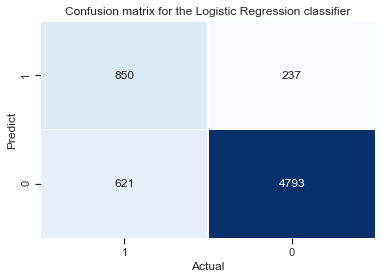


Now we will present some measures we learned:
-The accuracy is:    0.868020304568528
-The recall is:      0.5778382053025153
-The precision is:   0.7819687212511499
-The specificity is: 0.952882703777336
-The FPR is:         0.047117296222664015


In [61]:
LR1=LR_clf                                                                   # Choose linear regression model
LR1.fit(x_train,y_train)                                                     # Fit the model
predict_train=LR_clf.predict(x_valid)                                        # Predict with the mix set
cm=confusion_matrix(y_valid,predict_train)                                   # Create a confusion matrix object
tn, fp, fn, tp=cm.ravel()                                                    # Make the matrix in the right order that we know
cm_update=np.array([[tp,fp],[fn,tn]])                                        # Save the good matrix


# Plot the confusion matrix (with heat map)

sns.heatmap(cm_update, cmap="Blues", annot=True,fmt="d",cbar=False,linewidth=0.3,xticklabels=['1','0'], yticklabels=['1','0'])
plt.xlabel('Actual')                                                          # Add title to x-axis
plt.ylabel('Predict')                                                         # Add title to y-axis
plt.title('Confusion matrix for the Logistic Regression classifier')          # Add title to the plot
b, t = plt.ylim()                                                             # discover the values for bottom and top
b += 0.5                                                                      # Add 0.5 to the bottom
t -= 0.5                                                                      # Subtract 0.5 from the top
plt.ylim(b, t)                                                                # update the ylim(bottom, top) valu
plt.show()

print ('\nNow we will present some measures we learned:')                     # Show measures that we learnes
print ('-The accuracy is:   ',accuracy_score(y_valid,predict_train))
print ('-The recall is:     ',recall_score(y_valid,predict_train))
print ('-The precision is:  ',precision_score(y_valid,predict_train))
print ('-The specificity is:',str(tn/(tn+fp)))
print ('-The FPR is:        ',str(fp/(tn+fp)))


Let's see here the cells we got in the matrix and what they mean.

In [62]:
print ('-True Positive(TP)='+str(tp)+' :The model predicts that the label is 1 and indeed the true is 1- Correct classification (Hit).')
print ('-False Positive(FP)='+str(fp)+' :The model predicts that the label is 1 but the label is 0- Incorrect classification (False alarm).')
print ('-True Negative(TN)='+str(tn)+' :The model predicts that the label is 0 and indeed the true is 0- Correct classification (Correct   rejection).')
print ('-False Negative(FN)='+str(fn)+' :The model predicts that the label is 0 but the true is 1- Incorrect classification (Miss).')

-True Positive(TP)=850 :The model predicts that the label is 1 and indeed the true is 1- Correct classification (Hit).
-False Positive(FP)=237 :The model predicts that the label is 1 but the label is 0- Incorrect classification (False alarm).
-True Negative(TN)=4793 :The model predicts that the label is 0 and indeed the true is 0- Correct classification (Correct   rejection).
-False Negative(FN)=621 :The model predicts that the label is 0 but the true is 1- Incorrect classification (Miss).


Here we gonna test the new measure that we will suggest and sure that it is makes sense.

In [63]:
def new_acc(tp,fp,tn,fn,num):
    acc=(tp+tn)/(tp+tn+5*fn+fp)
    print (str(num)+'* for tp='+str(tp)+' fp='+str(fp)+' tn='+str(tn)+' fn='+str(fn)+' the assuracy is: '+str(round(acc,3)))

tp1,fp1,tn1,fn1=565,0,4663,0
new_acc(tp1,fp1,tn1,fn1,1)
tp2,fp2,tn2,fn2=0,208,0,643
new_acc(tp2,fp2,tn2,fn2,2)
tp3,fp3,tn3,fn3=565,208,4663,643
new_acc(tp3,fp3,tn3,fn3,3)
tp4,fp4,tn4,fn4=565,643,4663,208
new_acc(tp4,fp4,tn4,fn4,4)
tp5,fp5,tn5,fn5=565,208,4663,0
new_acc(tp5,fp5,tn5,fn5,5)
tp6,fp6,tn6,fn6=565,0,4663,643
new_acc(tp6,fp6,tn6,fn6,6)
tp7,fp7,tn7,fn7=0,208,4663,643
new_acc(tp7,fp7,tn7,fn7,7)
tp8,fp8,tn8,fn8=565,208,0,643
new_acc(tp8,fp8,tn8,fn8,8)

1* for tp=565 fp=0 tn=4663 fn=0 the assuracy is: 1.0
2* for tp=0 fp=208 tn=0 fn=643 the assuracy is: 0.0
3* for tp=565 fp=208 tn=4663 fn=643 the assuracy is: 0.604
4* for tp=565 fp=643 tn=4663 fn=208 the assuracy is: 0.756
5* for tp=565 fp=208 tn=4663 fn=0 the assuracy is: 0.962
6* for tp=565 fp=0 tn=4663 fn=643 the assuracy is: 0.619
7* for tp=0 fp=208 tn=4663 fn=643 the assuracy is: 0.577
8* for tp=565 fp=208 tn=0 fn=643 the assuracy is: 0.142


1* As we expected all classifications are correct and therefore the accuracy is 1.
<br>2* As we expected, there is no correct classification so the accuracy is 0.
<br>3* This is the accuracy with not manipulation.
<br>4* We changed 3* so fn and fp were interchanged. That is, fn is the lowest and so is the punishment and therefore the accuracy is greater. 
<br>5* We changed 3* so fn=0. That is, there is no penalty at all for misclassification and therefore as expected accuracy increases.
<br>6* We changed 3* so fp=0. That is, There are penalties but the number of incorrect classifications is small and therefore as expected the accuracy is smaller.
<br>7* We changed 3* so tn=0. That is, we reduced the amount of correct classifications and therefore, as expected, the accuracy is smaller.
<br>8* We changed 3* so tp=0.That is, we reduced the amount of correct classifications much more and therefore, as expected, the accuracy is much smaller.<br>
<b> This new measure does get accurate as expected in our tests and so we will use it.

### New measure
Weighted accuracy for each model is considered to be incorrect sampling cost with "1" labeling 5 times greater than incorrect sampling classification tagged "0". We compute this measure for each model that we created before.

In [64]:
for clf in clfs:                                         # For each classifier
    clf.fit(x_train,y_train)                             # Fit the model
    predict_train=clf.predict(x_valid)                   # Predict with the mix set
    cm=confusion_matrix(y_valid,predict_train)           # Create a confusion matrix object
    tn, fp, fn, tp=cm.ravel()                            # Make the matrix in the right order that we know
    acc=(tp+tn)/(tp+tn+5*fn+fp)                          # The new accuracy measure
    index_to_stop=str(clf).find("(")                     # Check where the clf object satrt with his arguments
    lable_clf=str(clf)[:index_to_stop]                   # Save the name of the current classifier
    print ('The accuracy with this new measure for the',lable_clf,'is:',str(round(acc,3)))

The accuracy with this new measure for the LogisticRegression is: 0.628
The accuracy with this new measure for the GaussianNB is: 0.452
The accuracy with this new measure for the MLPClassifier is: 0.631
The accuracy with this new measure for the AdaBoostClassifier is: 0.619


### ROC using K-folds

The function recives the following argumnets:
𝑋  - The input data in the usual format 
𝑦  - The output data in the usual format 
𝑐𝑙𝑓s  - A sklearn classifiers with the methods predict_proba and fit
𝑘  - the number of folds as it appears in Kfold.

The function will take the data and divide it into a training set and a validation set (test) and eventually evaluate each of the classifiers. It fit with the sets of train that we created before and after it calculate fpr, tpr and treshold. 
Finally, it should plot an ROC curve with the calculated AUC for each clf.

In [65]:
def KfoldPlot(X, y, clfs, k):
    clf_acc_train=[]                                                                          # creating a list for the mean accuracy for train
    clf_acc_test=[]                                                                           # creating a list for the mean accuracy for test
    plt.figure()                                                                              # Create a figure object, because we will show few plots in one plot                                           
    for clf in clfs:                                                                          # For each classifier
        kf=KFold(n_splits=k, shuffle=True)                                                    # Create K-Fold object with k splits

        train_TPR_mean=0.0                                                                    # Initialize the mean TPR for train
        train_FPR_mean=np.linspace(0, 1, 100)                                                 # Creates an array of 100 numbers between 0 and 1 in equal jumps for train

        test_TPR_mean=0.0                                                                     # Initialize the mean TPR for test
        test_FPR_mean=np.linspace(0, 1, 100)                                                  # Creates an array of 100 numbers between 0 and 1 in equal jumps for test

        for train_index, test_index in kf.split(X):                                           # Goes over the train set and test set from the KFold object (folds)
            X_train, X_test=X.iloc[train_index], X.iloc[test_index]                           # For Each fold in the loop, splits into train set and test set the input data
            y_train, y_test=y.iloc[train_index], y.iloc[test_index]                           # For Each fold in the loop, splits into train set and test set the output data
            clf.fit(X_train, y_train)                                                         # Fit with the sets of train that we created before 
          
            train_probabilities=clf.predict_proba(X_train)[:, 1]                              # Create probabilities for examining the train data (1 column). 
            fpr_train, tpr_train, thresholds_train=roc_curve(y_train, train_probabilities)    # We will get the corresponding TPR and FPR for each threshold created for the train
            train_TPR_mean+=interp(train_FPR_mean, fpr_train, tpr_train)                      # We will interpolate the tpr with FPR_mean and fpr so that they 'speak' the same language and update the train_TPR_mean
            train_TPR_mean[0] = 0.0                                                           # Update the first cell with 0 for the train

            test_probabilities=clf.predict_proba(X_test)[:, 1]                                # Create probabilities for examining the test data (1 column). 
            fpr_test, tpr_test, thresholds_test=roc_curve(y_test, test_probabilities)         # We will get the corresponding TPR and FPR for each threshold created for the test
            test_TPR_mean+=interp(test_FPR_mean, fpr_test, tpr_test)                          # We will interpolate the tpr with FPR_mean and fpr so that they 'speak' the same language and update the test_TPR_mean
            test_TPR_mean[0] = 0.0                                                            # Update the first cell with 0 for the test

        train_TPR_mean= train_TPR_mean/k                                                      # Calculate the TPR_mean by divide with k (number of folds) for train
        train_TPR_mean[-1]=1.0                                                                # Update the last cell with 1 for train
        train_AUC_mean=auc(train_FPR_mean, train_TPR_mean)                                    # Calculate the accuracy for train
        clf_acc_train.append(train_AUC_mean)
        
        test_TPR_mean= test_TPR_mean/k                                                        # Calculate the TPR_mean by divide with k (number of folds) for test
        test_TPR_mean[-1]=1.0                                                                 # Update the last cell with 1 for test
        test_AUC_mean=auc(test_FPR_mean, test_TPR_mean)                                       # Calculate the accuracy for test
        clf_acc_test.append(test_AUC_mean)
        
        index_to_stop=str(clf).find("(")                                                      # Check where the clf object satrt with his arguments
        lable_auc= 'Mean ROC for '+str(clf)[:index_to_stop]+' (area = '+str(round(test_AUC_mean, 3))+')'  # Create the title for the legend for ROC_mean's plot 
        plt.plot(test_FPR_mean, test_TPR_mean, label=lable_auc)                               # Plot the mean ROC and add title fot the legend

    plt.plot([0, 1], [0, 1], linestyle='--',color='blue')                                     # Plot a random guess line (after the loop is done)

    plt.xlim([0.0, 1.0])                                                                      # Decreases the space in the x-axis that has before 0 and after 1
    plt.ylim([0.0, 1.0])                                                                      # Decreases the space in the y-axis that has before 0 and after 1
    plt.xlabel('False Positive Rate')                                                         # Add a title to x-axis
    plt.ylabel('True Positive Rate')                                                          # Add a title to y-axis
    plt.title('ROC for all the classifires')                                                  # Add a titile to the whole plots
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, shadow=True)     # Add a legend in the right corner
    plt.show()                                                                                # Show the plot
    return (clf_acc_train,clf_acc_test)

#### Now we will check some options for different K's on K fold function
This method helps us train the model on a large amount of data but also leaves enough data to evaluate the model. We checked the function at k = 5,10,15 and decided to choose at the end k = 5 also because it is generally a chosen finger and also that the situation leaves a 20% test set which is large enough to make an evaluate.

In [66]:
# k=15                                                                                 # Choose the parameter k for the Kfold
# print ('The chosen k is:',k)
# lst_acc_train,lst_acc_test=KfoldPlot(final_train_data, train_lables, clfs, k)        # Call to the kfoldplot function

In [67]:
# k3=10                                                                                  # Choose the parameter k for the Kfold
# print ('The chosen k is:',k)
# lst_acc_train3,lst_acc_test3=KfoldPlot(final_train_data, train_lables, clfs, k3)       # Call to the kfoldplot function

The chosen k is: 5


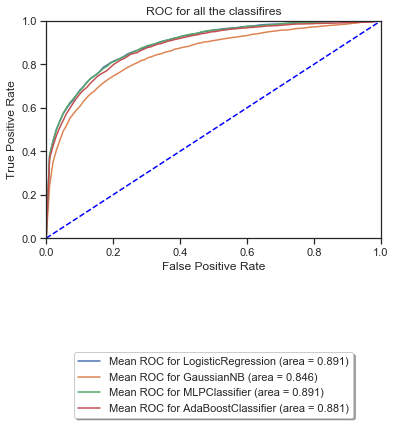

In [68]:
k2=5                                                                       # Choose the parameter k for the Kfold
print ('The chosen k is:',k2)
lst_acc_train2,lst_acc_test2=KfoldPlot(x_train, y_train, clfs, k2)         # Call to the kfoldplot function

--------
We splitted our data into train,validation and test and checked if there is a different on the AUC for the test data which
was not participated on the kFolds function. We saw that there is no difference that our eye could see. We will not run it but we will show here the function that we created and the results that we got. <b> We didn't use it.

In [69]:
def check_acc(final_train_data,train_lables):                                               
    k2=5                                                            # Choose the parameter k for the Kfold
    # Split the data to train and test
    x_train1,x_test1,y_train1,y_test1=train_test_split(final_train_data,train_lables,test_size=0.1,shuffle=True, random_state=42)
     # Call to the kfoldplot function only with the train set
    lst_acc_train2,lst_acc_test2,clf_fit=KfoldPlot(x_train1, y_train1, clfs, k2)      

    test_check_acc=[]                                               # Create a list for the accuracy with the test data on each classifier
    for clf in clf_fit:                                            
        predict_train=clf.predict(x_test1)                          # Predict with the mix set
        cm=confusion_matrix(y_test1,predict_train)                  # Create a confusion matrix object
        acc=accuracy_score(y_test1,predict_train)                   # Calculate the accuracy
        test_check_acc.append(acc)                                  # Append the accuracy to the list
    print (test_check_acc)

    overfitting (clf_str,lst_acc_train2,test_check_acc)             # Call to the overfitting function 


# clf_fit we got from a list that we initialize in the k-fold and apeended the fit model

# The results:
# [0.8638381845091267, 0.8608781450419339, 0.8628515046867291, 0.8544647261963493]
'''The result: We saw that there is not much differences so it is ok to use the kfold as we done before'''

'The result: We saw that there is not much differences so it is ok to use the kfold as we done before'

----------------
### Overfitting
We will examine whether our model with overfitting is by performance gap between the train set and test set. The performance gap will be according to the accuracy measure between the training set and the test set (the difference). 

To do this, from the K-Fold Cross Validation run, we kept each model its average measure of accuracy per set (validation, training) and visually represented in the graph scattering these 2 points per model. In addition to the visual form of the gap, we also quantitatively printed the gap between the training set and the set. We expect a positive gap between the training set and the test set as the training set always increases accuracy and the test may decrease at some point when it is overfitting.
<b> Overfitting if the gap is over than 0.03-That's how we get worse to be more accurate.

In [70]:
def overfitting (clfs,acc_train,acc_test,treshold):
    plt.figure(figsize=(8,5))                                                           # Create a figure object, because we will show few plots in one plot 
    plt.scatter(clfs,acc_train, label='mean accuracy for the train',color='deeppink')   # Create a scatter points for all of the train AUC
    plt.scatter(clfs,acc_test, label='mean accuracy for the test',color='deepskyblue')  # Create a scatter points for all of the test AUC
    plt.title('Mean auc for train and test for each model')                             # Add a title
    plt.xlabel('Classifier (model)')                                                    # Add X lable
    plt.ylabel ('Mean accuracy')                                                        # Add Y lable
    plt.legend(fancybox=True, shadow=True, loc='upper left')                            # Add legend
    plt.show()
    print ('If the gap is over than',treshold,'the model is overfitted.')
    gaps=[]
    for i in range(len(clfs)):
        gap=acc_train[i]-acc_test[i]
        gaps.append(gap)
        if gap>treshold:
            print ('The performance gap for',clfs[i],'classifier is:',gap,'---> Above',treshold,'-Overfitted')
        else:
            print ('The performance gap for',clfs[i],'classifier is:',gap)

We will create an object list with the names of the classifier so that we can insert them into the scatter plot.

In [71]:
clf_str=[]                                      # Initialize a list for the names of the classifier for the scatter plot
for clf in clfs:                                # For each classifier
    index_to_stop=str(clf).find("(")            # Check where the clf object satrt with his arguments
    name= str(clf)[:index_to_stop]              # Save the name of the classifier
    clf_str.append(name)                        # Append the name to the list

Apply the overfitting function on the accuracy for the test and train set when k=15. We didn't choose this so we will not run it.

In [72]:
# overfitting (clf_str,lst_acc_train,lst_acc_test)

Apply the overfitting function on the accuracy for the test and train set when k=10. We didn't choose this so we will not run it.

In [73]:
# overfitting (clf_str,lst_acc_train4,lst_acc_test4)

Apply the overfitting function on the accuracy for the test and train set when k=5.

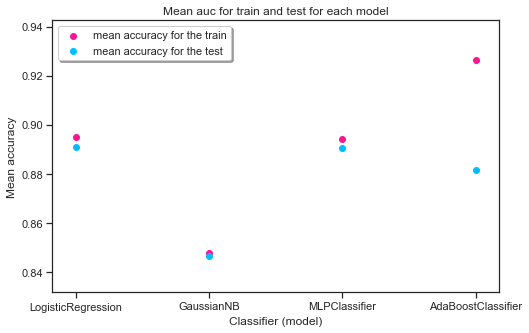

If the gap is over than 0.03 the model is overfitted.
The performance gap for LogisticRegression classifier is: 0.004153059933663994
The performance gap for GaussianNB classifier is: 0.0013132089423177895
The performance gap for MLPClassifier classifier is: 0.003377052888832055
The performance gap for AdaBoostClassifier classifier is: 0.04502395860203934 ---> Above 0.03 -Overfitted


In [74]:
overfitting (clf_str,lst_acc_train2,lst_acc_test2,0.03)  # Call to the overfitting function with the kfold that we chose with k=5

_________________
# Part 5- prediction on the test
--------------
We will use the test file given to us, fit the model according to the classifier selected on the training set and predict on the test set.
We will extract the probabilities for each label to predict and import them into a csv file only for the probabilities to tag as '1'.

In [75]:
ANN_clf.fit(final_train_data,train_lables)                        # Fit our model on the train data
y_predict_test=ANN_clf.predict_proba(final_test_data)[:,1]        # Predict the test data and choosing the probability for class 1
final_file=pd.DataFrame(y_predict_test,columns=['pred_proba'])    # Creating a dataframe adjusted to the given example
final_file.to_csv('Submission_group_10.csv')                      # Write our preditions to a csv codument